# Energy Emission Analysis on Countries


#### This notebook is part of a collection of notebooks studying how to reduce CO2 emission without curbing economic growth

****

## Overview

The world is becoming more modernized by the year, and with this becoming all the more POLLUTED.

**UN Official Data States:**

    1. Over 3 BILLION PEOPLE of the world’s 8 Billion people are affected by degrading ecosystems 
    2. Pollution is responsible for some 9 MILLION premature deaths each year
    3. Over 1 million plant and animal species risk extinction

HALF OF HUMANITY is in the CLIMATE DANGER ZONE and is fifteen times more likely to die from climate impacts such as extreme heat, floods, and drought. This means that over 200 million people could be displaced EACH  YEAR by climate disruption by 2050.


**CO2 Emission** refers to the Carbon Dioxide emitted throughout the world. In this dataset it is broadly catategorizing all emitters, transportation, lifestyle, industry etc.. into one total amount for each energy type.

CO2 emissions from the burning of fossil fuels are the primary cause of global warming which happens to be one of the biggest threats facing humanity in this day and age. Although there are plenty of other emissions that are emitted on this earth, including Methane, nitrous oxide, and CFCs, none compare to the emission of CO2, and we as humans are mostly to blame for this. For this analysis we will be focosing on CO2 Emissions and its effect on the world we live in as well as some key factors and stats that may play a role in the emission of CO2 globally.

Also, We will be building ML Models which can predict accurately CO2 emission using Projections and Targets would aid countries and The UN, make better-informed decisions to preserve this ONLY ONE EARTH.

****

**Table of Contents**
 * [Cleaning Data](#1)
 * [Data Structure](#2)
 * [Analysis](#3)
 * [Conclusion](#4)

**Categorization of different countries:** Categorizing countries into distinct groups based on its development is somewhat complex, and when it comes to classifying this, there is no single way (either grounded in theory or based on an objective benchmark) that is gererally accepted. The UN model, or there World Economic Situation and Prospects (WESP) report to be exact classifies every country into one of three broad categories: Developed Economies, Economy in transition, and Developing economy. This is the categorization Ill be using throughout this notebook.

**Warning:** We are not a climate scientist, some things may be inacurate. This is simply just a study on a subject im interested in, allowing me to go deeper into the subject while at the same time imporving my graphing skills. All my sources are at the bottom of the notebook.

**Column descriptions:**
 * **Country** - Country in question
 * **Energy_type** - Type of energy source
 * **Year** - Year the data was recorded
 * **Energy_consumption** - Amount of Consumption for the specific energy source, measured (quad Btu)
 * **Energy_production** - Amount of Production for the specific energy source, measured (quad Btu)
 * **GDP** - Countries GDP at purchasing power parities, measured (Billion 2015\$ PPP)
 * **Population** - Population of specific Country, measured (Mperson)
 * **Energy_intensity_per_capita** - Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as  units of energy per unit of capita (capita = individual person), measured (MMBtu/person)
 * **Energy_intensity_by_GDP**- Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of GDP, measred (1000 Btu/2015\$ GDP PPP)
 * **CO2_emission** - The amount of C02 emitted, measured  (MMtonnes CO2)

In [61]:
# Analysis Tools
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import math

# Plotting Tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extra Plotting Tools Required for Bar Chart Race
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Plot Design Settings
sns.set_style("darkgrid", {"axes.facecolor": "#eff2f5", 'grid.color': '#c0ccd8', 'patch.edgecolor': '#B0B0B0', 'font.sans-serif': 'Verdana'})
sns.set_palette('Dark2_r')
plt.rc('font', size=19)
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.rc('figure', titlesize=24)

# Other Tools
from sklearn.preprocessing import OneHotEncoder

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

<a id=1></a>

## **Cleaning Data**


****

In [62]:
rf = pd.read_csv("data/energy.csv")
rf.shape

(55440, 11)

In [63]:
rf.tail(6)

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
55434,55434,Zimbabwe,all_energy_types,2019,0.168651,0.143462,37.6204,14654.2,11.508701,4.482962,8.964759
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.6204,14654.2,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.6204,14654.2,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.6204,14654.2,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.6204,14654.2,11.508701,4.482962,0.000000
55439,55439,Zimbabwe,renewables_n_other,2019,0.068089,0.067499,37.6204,14654.2,11.508701,4.482962,0.000000


In [64]:
# Removing extra index column
rf = rf.drop(['Unnamed: 0'], axis=1)

### Renaming columns for simplicity

Some column names are quite long, im just going to shorten them to abreviations

In [65]:
rf.rename(columns={'Energy_type' : 'e_type', 'Energy_consumption' : 'e_con', 
                   'Energy_production' : 'e_prod', 'Energy_intensity_per_capita' : 'ei_capita', 
                   'Energy_intensity_by_GDP' : 'ei_gdp'}, inplace=True)

In [66]:
rf.head()

,Country,e_type,Year,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,CO2_emission
0,World,all_energy_types,1980,292.899790,296.337228,27770.91028,4298126.522,68.145921,10.547,4946.627130
1,World,coal,1980,78.656134,80.114194,27770.91028,4298126.522,68.145921,10.547,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.91028,4298126.522,68.145921,10.547,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.91028,4298126.522,68.145921,10.547,2455.243565
4,World,nuclear,1980,7.575700,7.575700,27770.91028,4298126.522,68.145921,10.547,0.000000


Great, much less complicated to write now

### Renaming e_type value names

Some of the values for the e_type column are very long, im going to shorten them

In [67]:
rf['e_type'] = rf['e_type'].astype('category')

rf['e_type'] = rf['e_type'].cat.rename_categories({'all_energy_types': 'all', 'natural_gas': 'nat_gas',
                                                   'petroleum_n_other_liquids': 'pet/oth',
                                                    'renewables_n_other': 'ren/oth'})

rf['e_type'] = rf['e_type'].astype('object')

### Data Types

Converting Year column to datetime dtype

In [68]:
# train_df['Year'] = train_df['Year'].astype('object')
# test_df['Year'] = test_df['Year'].astype('object')
# df = train_df
rf['Year'] = rf['Year'].astype('object')
df = rf

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       55440 non-null  object 
 1   e_type        55440 non-null  object 
 2   Year          55440 non-null  object 
 3   e_con         44287 non-null  float64
 4   e_prod        44289 non-null  float64
 5   GDP           40026 non-null  float64
 6   Population    46014 non-null  float64
 7   ei_capita     50358 non-null  float64
 8   ei_gdp        50358 non-null  float64
 9   CO2_emission  51614 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.2+ MB


### Columns Stats

In [70]:
df.describe(include='all')

,Country,e_type,Year,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,CO2_emission
count,55440,55440,55440.0,44287.000000,4.428900e+04,40026.000000,4.601400e+04,50358.000000,50358.000000,51614.000000
unique,231,6,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,World,all,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,240,9240,1386.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.537811,1.532700e+00,827.144126,6.263020e+04,71.898914,3.695104,78.800082
std,NaN,NaN,NaN,15.456596,1.530356e+01,5981.703144,4.562088e+05,113.728738,4.590735,902.221463
min,NaN,NaN,NaN,-0.163438,-1.000000e-39,0.124958,1.147100e+01,0.000000,0.000000,-0.005130
25%,NaN,NaN,NaN,0.000000,0.000000e+00,9.737780,1.141950e+03,3.799939,0.899446,0.000000
50%,NaN,NaN,NaN,0.018381,5.121970e-04,47.757100,6.157680e+03,29.779260,2.987593,0.000000
75%,NaN,NaN,NaN,0.209422,1.125410e-01,263.687100,2.004290e+04,95.523627,4.969454,4.318822


### Features Unique Values

In [71]:
# Number of unique values in each variable
for var in df:
    print(f'{var}: {df[var].nunique()}')

Country: 231
e_type: 6
Year: 40
e_con: 30460
e_prod: 20598
GDP: 6653
Population: 7657
ei_capita: 7430
ei_gdp: 6486
CO2_emission: 16993


### Duplicates

In [72]:
print('Number of Duplicates: {}'.format(len(df[df.duplicated()])))

Number of Duplicates: 0


Cool, no duplicate values

### Missing Values

There is quite a bit of data thats missing in this dataset. For example, some of the missing data is because the given country no longer exists, leaving only NaN values before/after its creation/collapse, theres is also a lot of data missing not at random (MNAR), as well as data missing at random (MAR). I will be dealing with each of these appropriatlly in this section

In [73]:
for var in df:
    print(f'{var}: {df[var].isnull().sum()}')

Country: 0
e_type: 0
Year: 0
e_con: 11153
e_prod: 11151
GDP: 15414
Population: 9426
ei_capita: 5082
ei_gdp: 5082
CO2_emission: 3826


<AxesSubplot:>

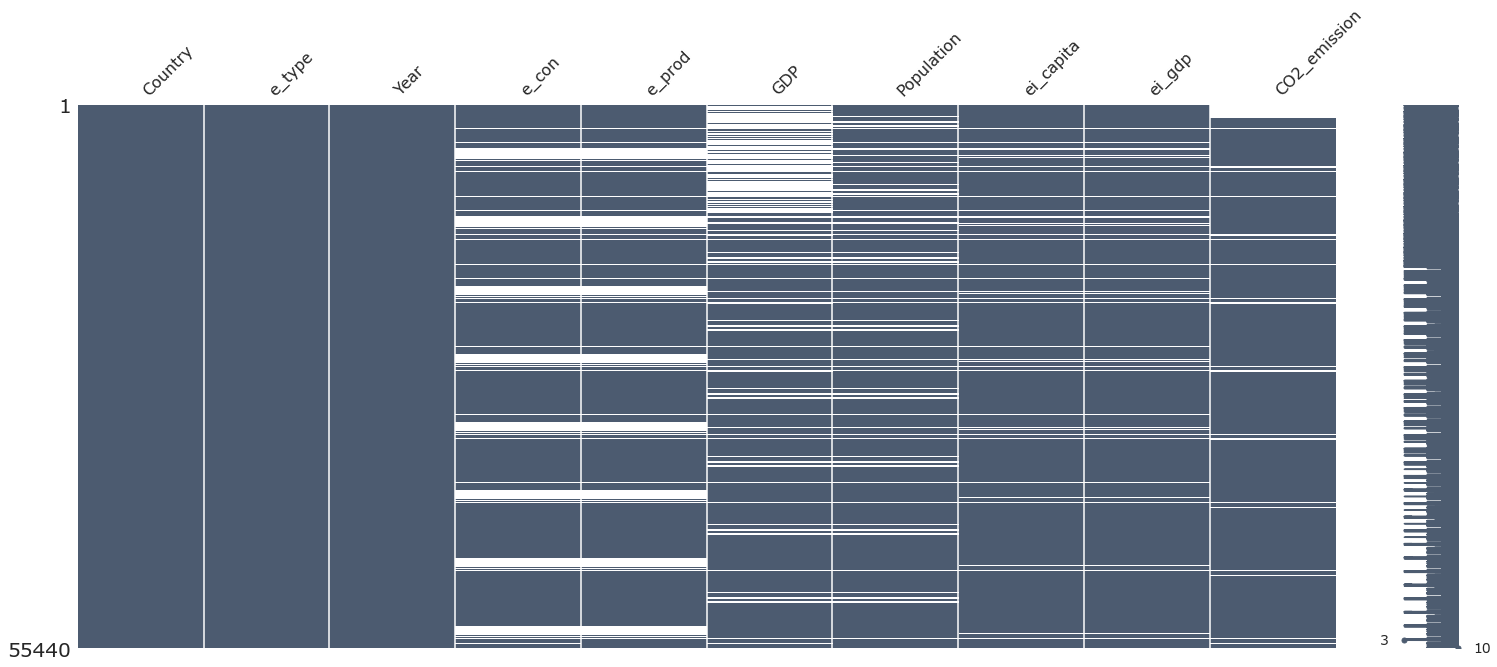

In [74]:
#Missing data as white lines 
import missingno as msno
msno.matrix(df,color=(0.3,0.36,0.44))

In [75]:
# Function we'll be using to drop selected coutries
def to_drop(list):
    for country in list:
        value = df[df['Country']==country].index
        df.drop(labels=value, axis=0, inplace=True)

**Taking care of countries that no longer exist or formed within the time period**

Quite a bit of the Countries/Territories in this dataset no longer exist or have become another country, leaving only NaN values for the years they didnt exist. Im going to drop all the rows of these years. Below are some examples of some of these countries.

In [76]:
df[df['Country']=='Former U.S.S.R.']

,Country,e_type,Year,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,CO2_emission
426,Former U.S.S.R.,all,1980,51.569984,61.506642,NaN,NaN,0.0,0.0,NaN
427,Former U.S.S.R.,coal,1980,15.909849,17.152565,NaN,NaN,0.0,0.0,NaN
428,Former U.S.S.R.,nat_gas,1980,13.861120,15.984800,NaN,NaN,0.0,0.0,NaN
429,Former U.S.S.R.,pet/oth,1980,19.117843,25.624987,NaN,NaN,0.0,0.0,NaN
430,Former U.S.S.R.,nuclear,1980,0.832639,0.832639,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
54481,Former U.S.S.R.,coal,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54482,Former U.S.S.R.,nat_gas,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54483,Former U.S.S.R.,pet/oth,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54484,Former U.S.S.R.,nuclear,2019,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [77]:
df[df['Country']=='South Sudan']

,Country,e_type,Year,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,CO2_emission
1146,South Sudan,all,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1147,South Sudan,coal,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1148,South Sudan,nat_gas,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1149,South Sudan,pet/oth,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150,South Sudan,nuclear,1980,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...
55201,South Sudan,coal,2019,0.000000,0.000000,17.3349,11062.1,2.404033,1.534111,0.000000
55202,South Sudan,nat_gas,2019,0.000000,0.000000,17.3349,11062.1,2.404033,1.534111,0.000000
55203,South Sudan,pet/oth,2019,0.026558,0.291543,17.3349,11062.1,2.404033,1.534111,1.675889
55204,South Sudan,nuclear,2019,NaN,NaN,17.3349,11062.1,2.404033,1.534111,0.000000


For all the years that each of the countries didnt exist, a set of NaN values remain for its columns. Luckily, theres a tool we can use to simply drop all rows with a certain amount of NaN values in them, which is dropna(). Im going to drop all the rows of the countries with more than 3 values set to NaN as this will take care of the years these countries didnt exist as well as rows that have to little information.

In [78]:
# Using a threshold of 7, which means all rows that have less than 7 non NaN values will be dropped
df.dropna(thresh=7, axis=0, inplace=True)

In [79]:
df[df['Country']=='Former U.S.S.R.'].head()

,Country,e_type,Year,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,CO2_emission
426,Former U.S.S.R.,all,1980,51.569984,61.506642,NaN,NaN,0.0,0.0,NaN
427,Former U.S.S.R.,coal,1980,15.909849,17.152565,NaN,NaN,0.0,0.0,NaN
428,Former U.S.S.R.,nat_gas,1980,13.861120,15.984800,NaN,NaN,0.0,0.0,NaN
429,Former U.S.S.R.,pet/oth,1980,19.117843,25.624987,NaN,NaN,0.0,0.0,NaN
430,Former U.S.S.R.,nuclear,1980,0.832639,0.832639,NaN,NaN,0.0,0.0,0.0


Perfect, all the countries that were newly created or had fallen in the timezone of the dataset are all taken care of

In [80]:
# check for missing values again
for var in df:
    print(f'{var}: {df[var].isnull().sum()}')

Country: 0
e_type: 0
Year: 0
e_con: 6327
e_prod: 6326
GDP: 10740
Population: 4800
ei_capita: 984
ei_gdp: 984
CO2_emission: 1249


**C02_emission column**

In [81]:
# Number of values for each year
temp_co2 = df[df['Year']<=2016]
temp_co2.groupby('Year')['CO2_emission'].count()

Year
1980     378
1981    1155
1982    1156
1983    1156
1984    1155
1985    1155
1986    1157
1987    1156
1988    1160
1989    1161
1990    1163
1991    1157
1992    1188
1993    1268
1994    1278
1995    1282
1996    1282
1997    1284
1998    1288
1999    1288
2000    1288
2001    1288
2002    1289
2003    1291
2004    1295
2005    1295
2006    1294
2007    1302
2008    1304
2009    1308
2010    1308
2011    1307
2012    1310
2013    1314
2014    1314
2015    1314
2016    1314
Name: CO2_emission, dtype: int64

Also removing all values that have C02_emission as NaN, as these values will be useless in this analysis

In [82]:
df.dropna(subset=['CO2_emission'], inplace=True)

**e_con and e_prod columns**

A lot of values from e_con and e_prod are missing due to the fact that most countries dont consume or produce Nuclear energy, so they leave them as Nan. Im going to add 0 in place of these

In [83]:
# Splitting e_type nuclear from rest of dataset
nuclear = df[df['e_type']=='nuclear']
    
# Keeping the remaining of the main dataset
temp_ecp = df[df['e_type']!='nuclear']

# Replacing all Nan values of e_con and e_prod of e_type nuclear to 0
nuclear[['e_con', 'e_prod']] = nuclear[['e_con', 'e_prod']].replace(np.nan, 0)

# Joining them back up
df = pd.concat([nuclear, temp_ecp]).sort_index()

In [84]:
# check for missing values again
for var in df:
    print(f'{var}: {df[var].isnull().sum()}')

Country: 0
e_type: 0
Year: 0
e_con: 0
e_prod: 0
GDP: 9848
Population: 4415
ei_capita: 968
ei_gdp: 968
CO2_emission: 0


**GDP column**

Keep in mind that each country has 234 values within the dataset, one for each of the 6 energy types, each year. So any countries with more than 100 missing GDP values will be problametic. I will be dropping all these countries for this reason.

In [85]:
temp_gdp = pd.DataFrame(df['GDP'].isnull().groupby(df['Country']).sum()).reset_index()
# Countries with more than 90 missing GDP values
temp_gdp = temp_gdp[temp_gdp['GDP']>=90]

temp_gdp

,Country,GDP
3,American Samoa,134
5,Antarctica,196
45,Cook Islands,196
64,Falkland Islands,196
65,Faroe Islands,183
73,French Guiana,196
74,French Polynesia,196
82,Gibraltar,196
87,Guam,134
133,Micronesia,161


In [86]:
# Making List of all these countries
m_gdp = [country for country in temp_gdp['Country']]

# Dropping all the countries on the list from the main dataset (Function used is the one above)
to_drop(m_gdp)

Looking further into the the values of GDP from the years 1980 to 1987

In [87]:
temp_gdp = df[df['Year']<=1990]
temp_gdp.groupby('Year')['e_con', 'e_prod', 'GDP', 'Population', 'ei_capita', 'ei_gdp', 'CO2_emission'].count()

,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,CO2_emission
Year,,,,,,,
1980,349,349,109,335,344,344,349
1981,1045,1045,310,990,1021,1021,1045
1982,1045,1045,310,990,1021,1021,1045
1983,1045,1045,310,990,1021,1021,1045
1984,1044,1044,310,978,1020,1020,1044
1985,1044,1044,310,978,1020,1020,1044
1986,1046,1046,310,980,1022,1022,1046
1987,1045,1045,310,984,1021,1021,1045
1988,1049,1049,972,1008,1025,1025,1049


Youll notice in the GDP column from 1980 to 1987 not many countries gave this information, which means theres a lot of NaN values, this is a problem of course.

In [88]:
# Looking further into the GDP data before 1988
temp_gdp = df[df['Year']<=1987]
temp_gdp = pd.DataFrame(temp_gdp['GDP'].isnull().groupby(temp_gdp['Country']).sum()).reset_index()

# Countries with more than 30 missing GDP values
temp_gdp = temp_gdp[temp_gdp['GDP']>30]
temp_gdp.head(200)

,Country,GDP
0,Afghanistan,44
1,Albania,44
2,Algeria,44
3,Angola,44
4,Antigua and Barbuda,36
...,...,...
170,Vanuatu,44
172,Vietnam,44
174,Yemen,44
175,Zambia,44


Having 42 missing GDP values like the countries above means that all GDP values from the time period of 1980-1987 are NaN. This implys close to half the countries in this dataset have no GDP data in this timeperiod! This is not good of course as this is an important column for this analysis, so Ill be removing everything up to 1988.

In [89]:
#Removing everything up to 1988
df = df[df['Year']>=1988]

**Population column**

In [90]:
temp_pop = pd.DataFrame(df['Population'].isnull().groupby(df['Country']).sum()).reset_index()
# Countries with more than 100 missing Population values
temp_pop = temp_pop[temp_pop['Population']>=100]

temp_pop

,Country,Population


Dont seem to be any Population values over 100 in the dataset anymore, I assume I already dealt with them when I removed all the countries with a high missing value counts for the GDP values.

The only countries with missing population data seem to be former countries, including the USSR, West and East Germany, Former Yugoslavia etc, mostly former easter block countries. Im going to drop all these countries for simplicity.

In [91]:
temp_pop = pd.DataFrame(df[df['Population'].isnull()])
cont = temp_pop['Country'].unique()

print(cont)

to_drop(cont)

['Former Czechoslovakia' 'Former U.S.S.R.' 'Former Yugoslavia'
 'Germany, East' 'Germany, West' 'Hungary' 'Poland'
 'Former Serbia and Montenegro']


**ei_capita and ei_gdp columns**

In [92]:
# ei_capita
temp_ei_capita = pd.DataFrame(df['ei_capita'].isnull().groupby(df['Country']).sum()).reset_index()
# Countries with missing ei_capita values
temp_ei_capita = temp_ei_capita[temp_ei_capita['ei_capita']>0]


# ei_gdp
temp_ei_gdp = pd.DataFrame(df['ei_gdp'].isnull().groupby(df['Country']).sum()).reset_index()
# Countries with missing ei_gdp values
temp_ei_gdp = temp_ei_gdp[temp_ei_gdp['ei_gdp']>0]


print(temp_ei_capita, '\n')
print(temp_ei_gdp)

                  Country  ei_capita
70              Greenland        155
80                Iceland        160
124  Netherlands Antilles        160
180   Trinidad and Tobago        160
184   U.S. Virgin Islands        160 

                  Country  ei_gdp
70              Greenland     155
80                Iceland     160
124  Netherlands Antilles     160
180   Trinidad and Tobago     160
184   U.S. Virgin Islands     160


Its the same countries that are missing these values, and they all have a relatively small population of around 1 million or less as well, so for simplicity im going to remove them as they probably wont be of much importance compared to the rest of the countries

In [93]:
# Making List of all these countries
m_ei_capita = [country for country in temp_ei_capita['Country']]
m_ei_gdp = [country for country in temp_ei_gdp['Country']]

# Dropping all the countries on the list from the main dataset
to_drop(m_ei_capita)
to_drop(m_ei_gdp)

**Taking care of all other missing data using KNN imputation**

What missing data is left...

In [94]:
for var in df:
    print(f'{var}: {df[var].isnull().sum()}')

Country: 0
e_type: 0
Year: 0
e_con: 0
e_prod: 0
GDP: 128
Population: 0
ei_capita: 0
ei_gdp: 0
CO2_emission: 0


Perfect, a lot of the missing data has been taken care of, most of it being the data not missing at random (MNAR), I can now just use KNN imputation to take care of the rest.

In [95]:
from sklearn.impute import KNNImputer

# One hot encoding the categorical variables for now
cat_vars = df[['Country', 'e_type', 'Year']]
cat_dummies = pd.get_dummies(cat_vars, drop_first=True)


# Creating Temporary dataset
temp_m = df.drop(['Country', 'e_type', 'Year'], axis=1)
temp_m = pd.concat([cat_dummies, temp_m], axis=1)

# KNN Imputer
imputer = KNNImputer(
    n_neighbors=5, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

# Attaching the Imputer to dataset
temp_m = imputer.fit_transform(temp_m)
temp_m = pd.DataFrame(temp_m)

temp_m.head()

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,345.560876,347.412863,42106.5954,4927545.084,70.128405,8.206811,21163.840560
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,96.873178,98.484482,42106.5954,4927545.084,70.128405,8.206811,8930.924825
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,71.010048,71.852938,42106.5954,4927545.084,70.128405,8.206811,3571.676242
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,133.445814,132.485303,42106.5954,4927545.084,70.128405,8.206811,8661.239490
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19.226897,19.226897,42106.5954,4927545.084,70.128405,8.206811,0.000000


Now i just need to join these new values back into the original dataset

In [96]:
# Removing the encoded data from the temp_data dataset
cut_data = temp_m.iloc[:,229:]

# Removing the section of data im going to replace from the original dataset df
columns = df.columns
original_data = df.iloc[:,:3].reset_index(drop=True)

# Merging the two
#temp = pd.concat([original_data, temp_data], axis=1).drop('index', 1).set_axis(columns, axis=1, inplace=False)
df = pd.concat([original_data, cut_data], axis=1).reset_index(drop=True).set_axis(columns, axis=1, inplace=False)

In [97]:
df.head(10)

,Country,e_type,Year,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,CO2_emission
0,World,all,1988,345.560876,347.412863,42106.5954,4927545.084,70.128405,8.206811,21163.840560
1,World,coal,1988,96.873178,98.484482,42106.5954,4927545.084,70.128405,8.206811,8930.924825
2,World,nat_gas,1988,71.010048,71.852938,42106.5954,4927545.084,70.128405,8.206811,3571.676242
3,World,pet/oth,1988,133.445814,132.485303,42106.5954,4927545.084,70.128405,8.206811,8661.239490
4,World,nuclear,1988,19.226897,19.226897,42106.5954,4927545.084,70.128405,8.206811,0.000000
5,World,ren/oth,1988,24.927484,25.363243,42106.5954,4927545.084,70.128405,8.206811,0.000000
6,Afghanistan,all,1988,0.111221,0.121394,37.7013,11618.000,9.573144,2.950052,3.646724
7,Afghanistan,coal,1988,0.002875,0.002731,37.7013,11618.000,9.573144,2.950052,0.324617
8,Afghanistan,nat_gas,1988,0.073290,0.110982,37.7013,11618.000,9.573144,2.950052,1.222107
9,Afghanistan,pet/oth,1988,0.027375,0.000000,37.7013,11618.000,9.573144,2.950052,2.100000


In [98]:
for var in df:
    print(f'{var}: {df[var].isnull().sum()}')

Country: 0
e_type: 0
Year: 0
e_con: 0
e_prod: 0
GDP: 0
Population: 0
ei_capita: 0
ei_gdp: 0
CO2_emission: 0


<AxesSubplot:>

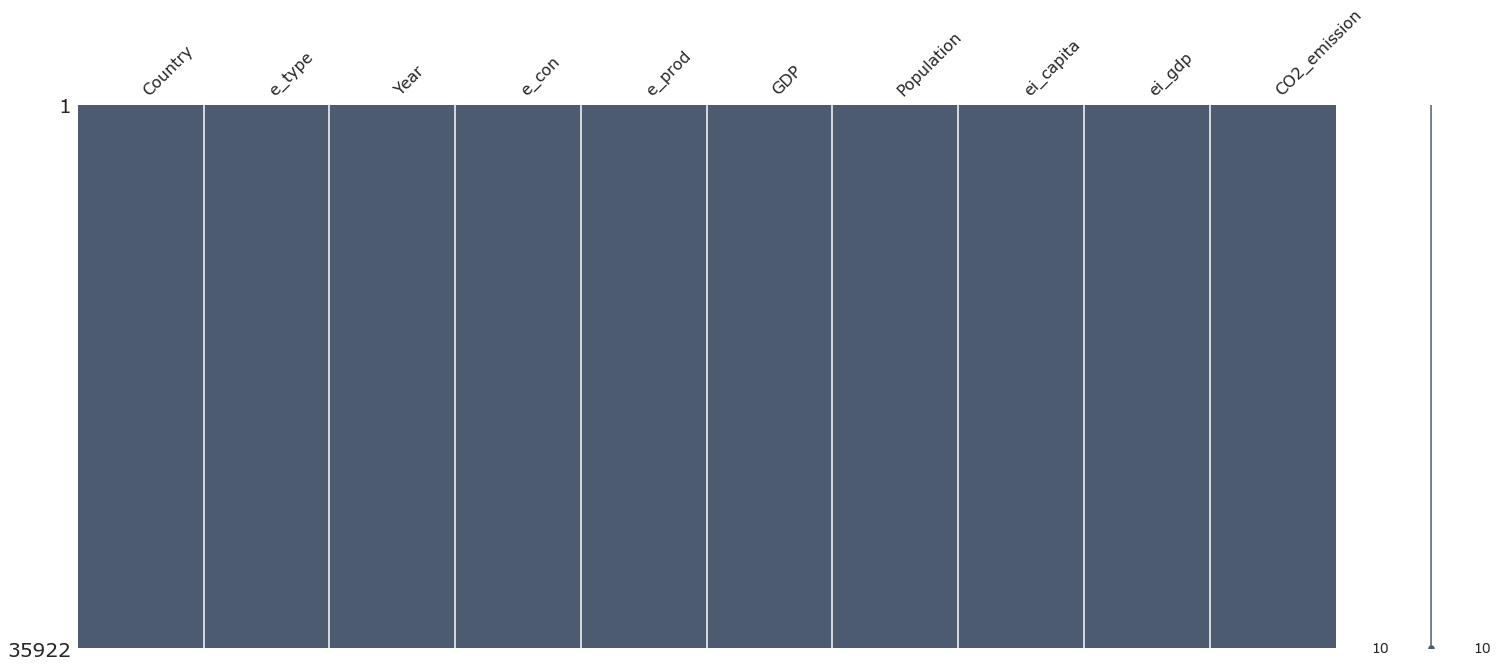

In [99]:
msno.matrix(df,color=(0.3,0.36,0.44))

Perfect, all the missing data is taken care of!

### Rounding Float Values

The float values in this dataset have way to much decimal points, im going to reduce them to 2 for simpler readability

In [100]:
for var in df:
    if df[var].dtype == 'float':
        df[var] = df[var].round(2)

### Final Look at the Dataset

In [101]:
df.head()

,Country,e_type,Year,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,CO2_emission
0,World,all,1988,345.56,347.41,42106.6,4927545.08,70.13,8.21,21163.84
1,World,coal,1988,96.87,98.48,42106.6,4927545.08,70.13,8.21,8930.92
2,World,nat_gas,1988,71.01,71.85,42106.6,4927545.08,70.13,8.21,3571.68
3,World,pet/oth,1988,133.45,132.49,42106.6,4927545.08,70.13,8.21,8661.24
4,World,nuclear,1988,19.23,19.23,42106.6,4927545.08,70.13,8.21,0.00


In [102]:
df.shape

(35922, 10)

Weve gotten rid of 19,388 rows of data, thats a lot! Its okay though, theres still plenty of data to finish the analysis

<a id=2></a>

# Deeper look into the data were working with

****

Now that weve taken care of the cleaning process, we can now start looking into the data

**Target Distribution**

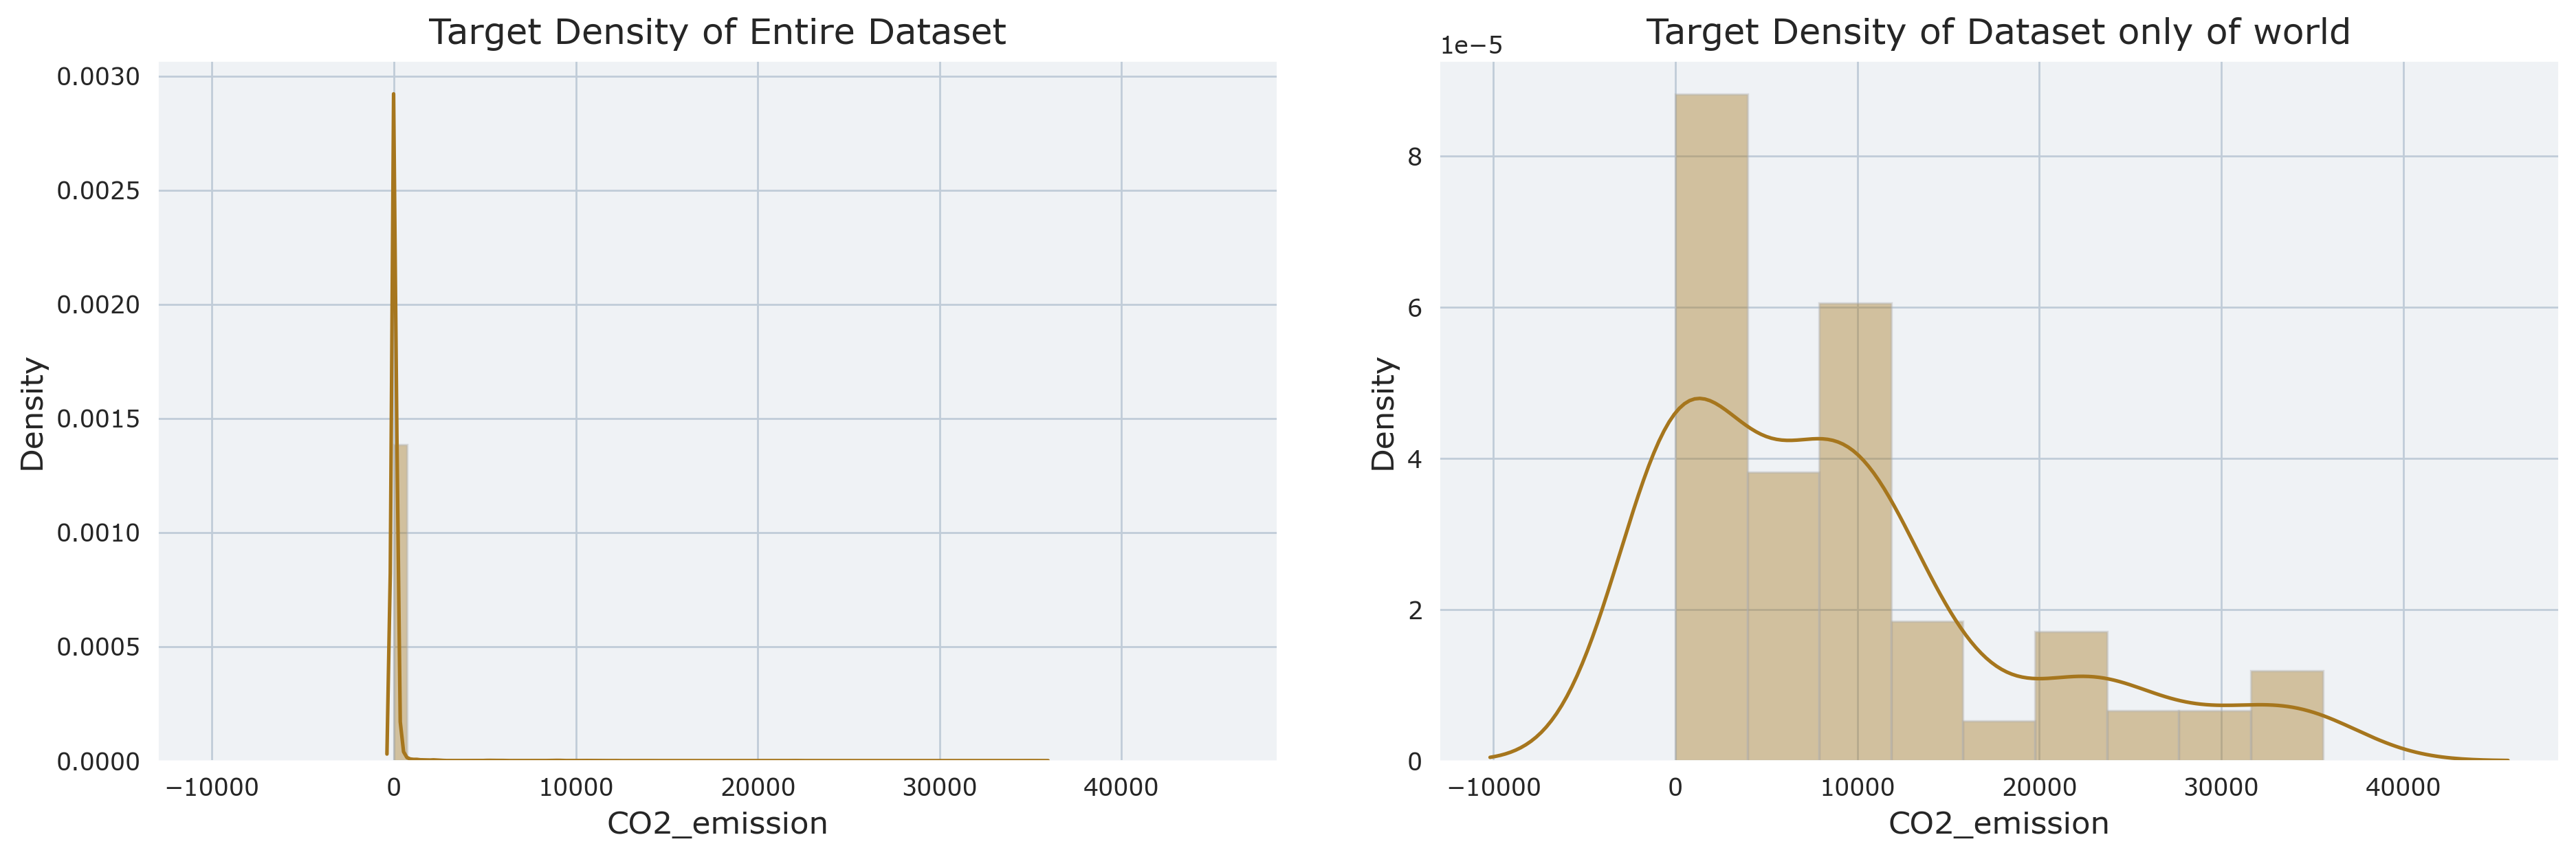

In [103]:
with plt.rc_context(rc = {'figure.dpi': 250, 'axes.labelsize': 13,
                          'xtick.labelsize': 10, 'ytick.labelsize': 10,
                          'legend.title_fontsize': 7, 'axes.titlesize': 15,
                          'axes.titlepad': 7}):


    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
    
    # Entire dataset
    sns.distplot(df['CO2_emission'], ax=ax[0]).set_title('Target Density of Entire Dataset')
    
    # Dataset only of world
    world = df[df['Country']=='World']
    sns.distplot(world['CO2_emission'], ax=ax[1]).set_title('Target Density of Dataset only of world')
    

    plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
    plt.show()

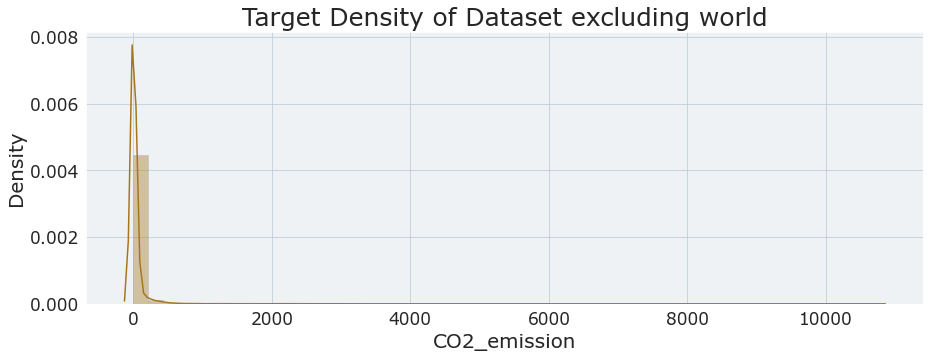

In [104]:
not_world = df[df['Country']!='World']

plt.figure(figsize=(15, 5))
sns.distplot(not_world['CO2_emission']).set_title('Target Density of Dataset excluding world')
plt.show()

The distribution is highly right skewed.

**Distribution of energy types**

In [105]:
temp_dist = df.groupby('e_type').count()['CO2_emission'].reset_index().sort_values(by='CO2_emission',ascending=False)
temp_dist.style.background_gradient(cmap='winter')

,e_type,CO2_emission
3,nuclear,6007
5,ren/oth,6007
0,all,5977
1,coal,5977
2,nat_gas,5977
4,pet/oth,5977


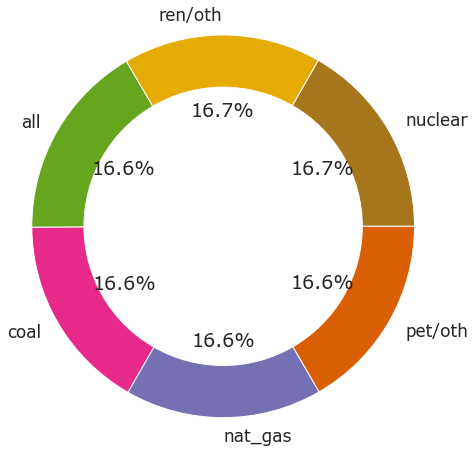

In [106]:
percent = temp_dist['CO2_emission']
labels= temp_dist['e_type']

my_pie,_,_ = plt.pie(percent, radius = 2.2, labels=labels, autopct="%.1f%%")
plt.setp(my_pie, width=0.6, edgecolor='white') 
plt.show()

All energy types pretty much equally distributed

**Correlations**

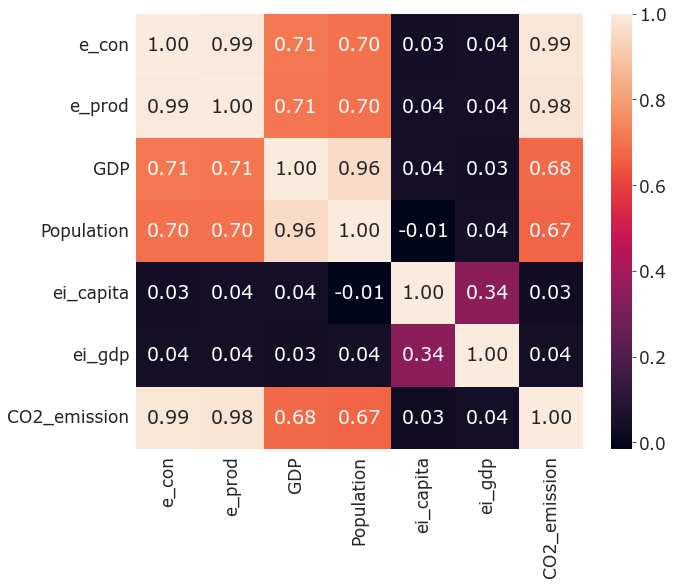

In [107]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.iloc[:,3:].corr(), annot=True, fmt='.2f')
plt.show()

**Pair Plot**

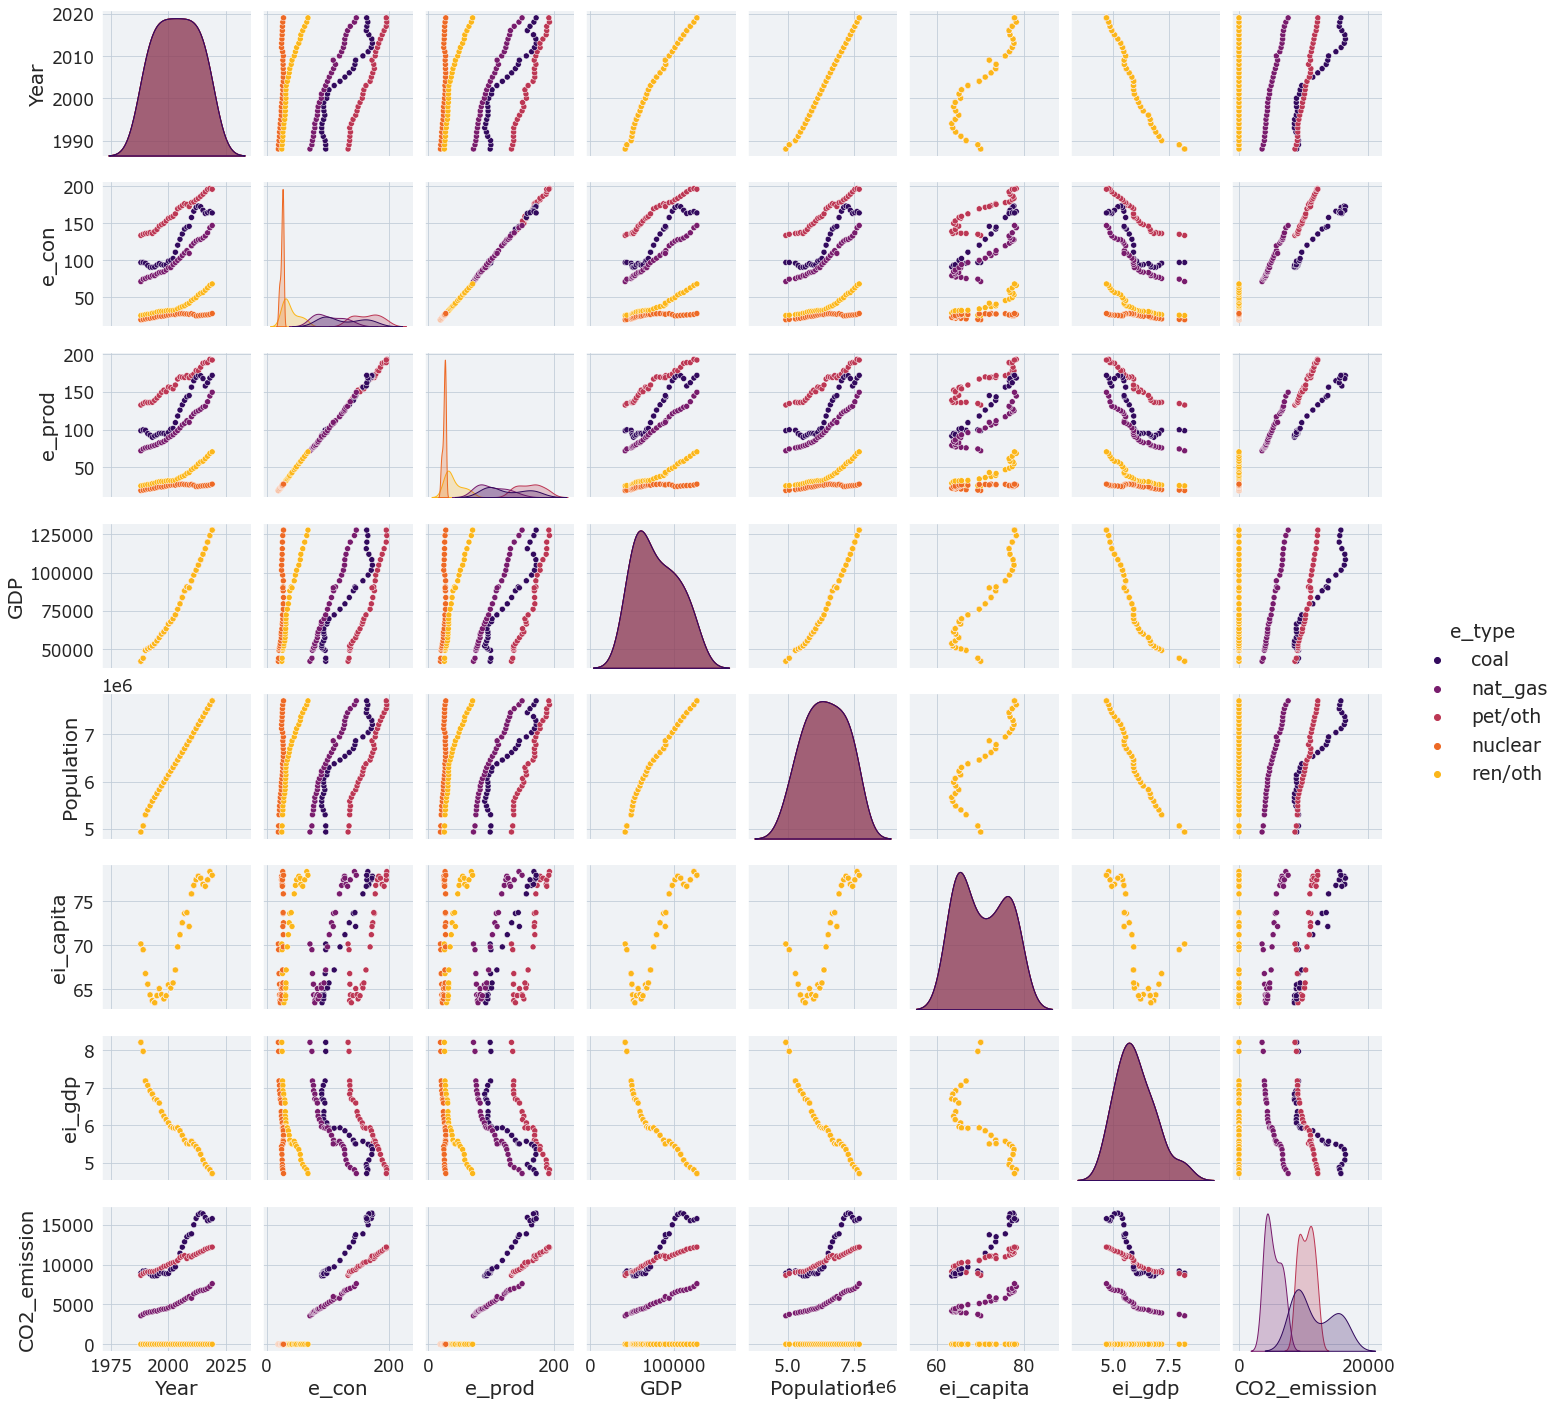

In [108]:
temp_pp = df[df['Country']=='World'][df['e_type']!='all']

sns.pairplot(temp_pp, hue='e_type',palette="inferno")
plt.show()

<a id=3></a>

# Analysis

****

**Quick Overview**

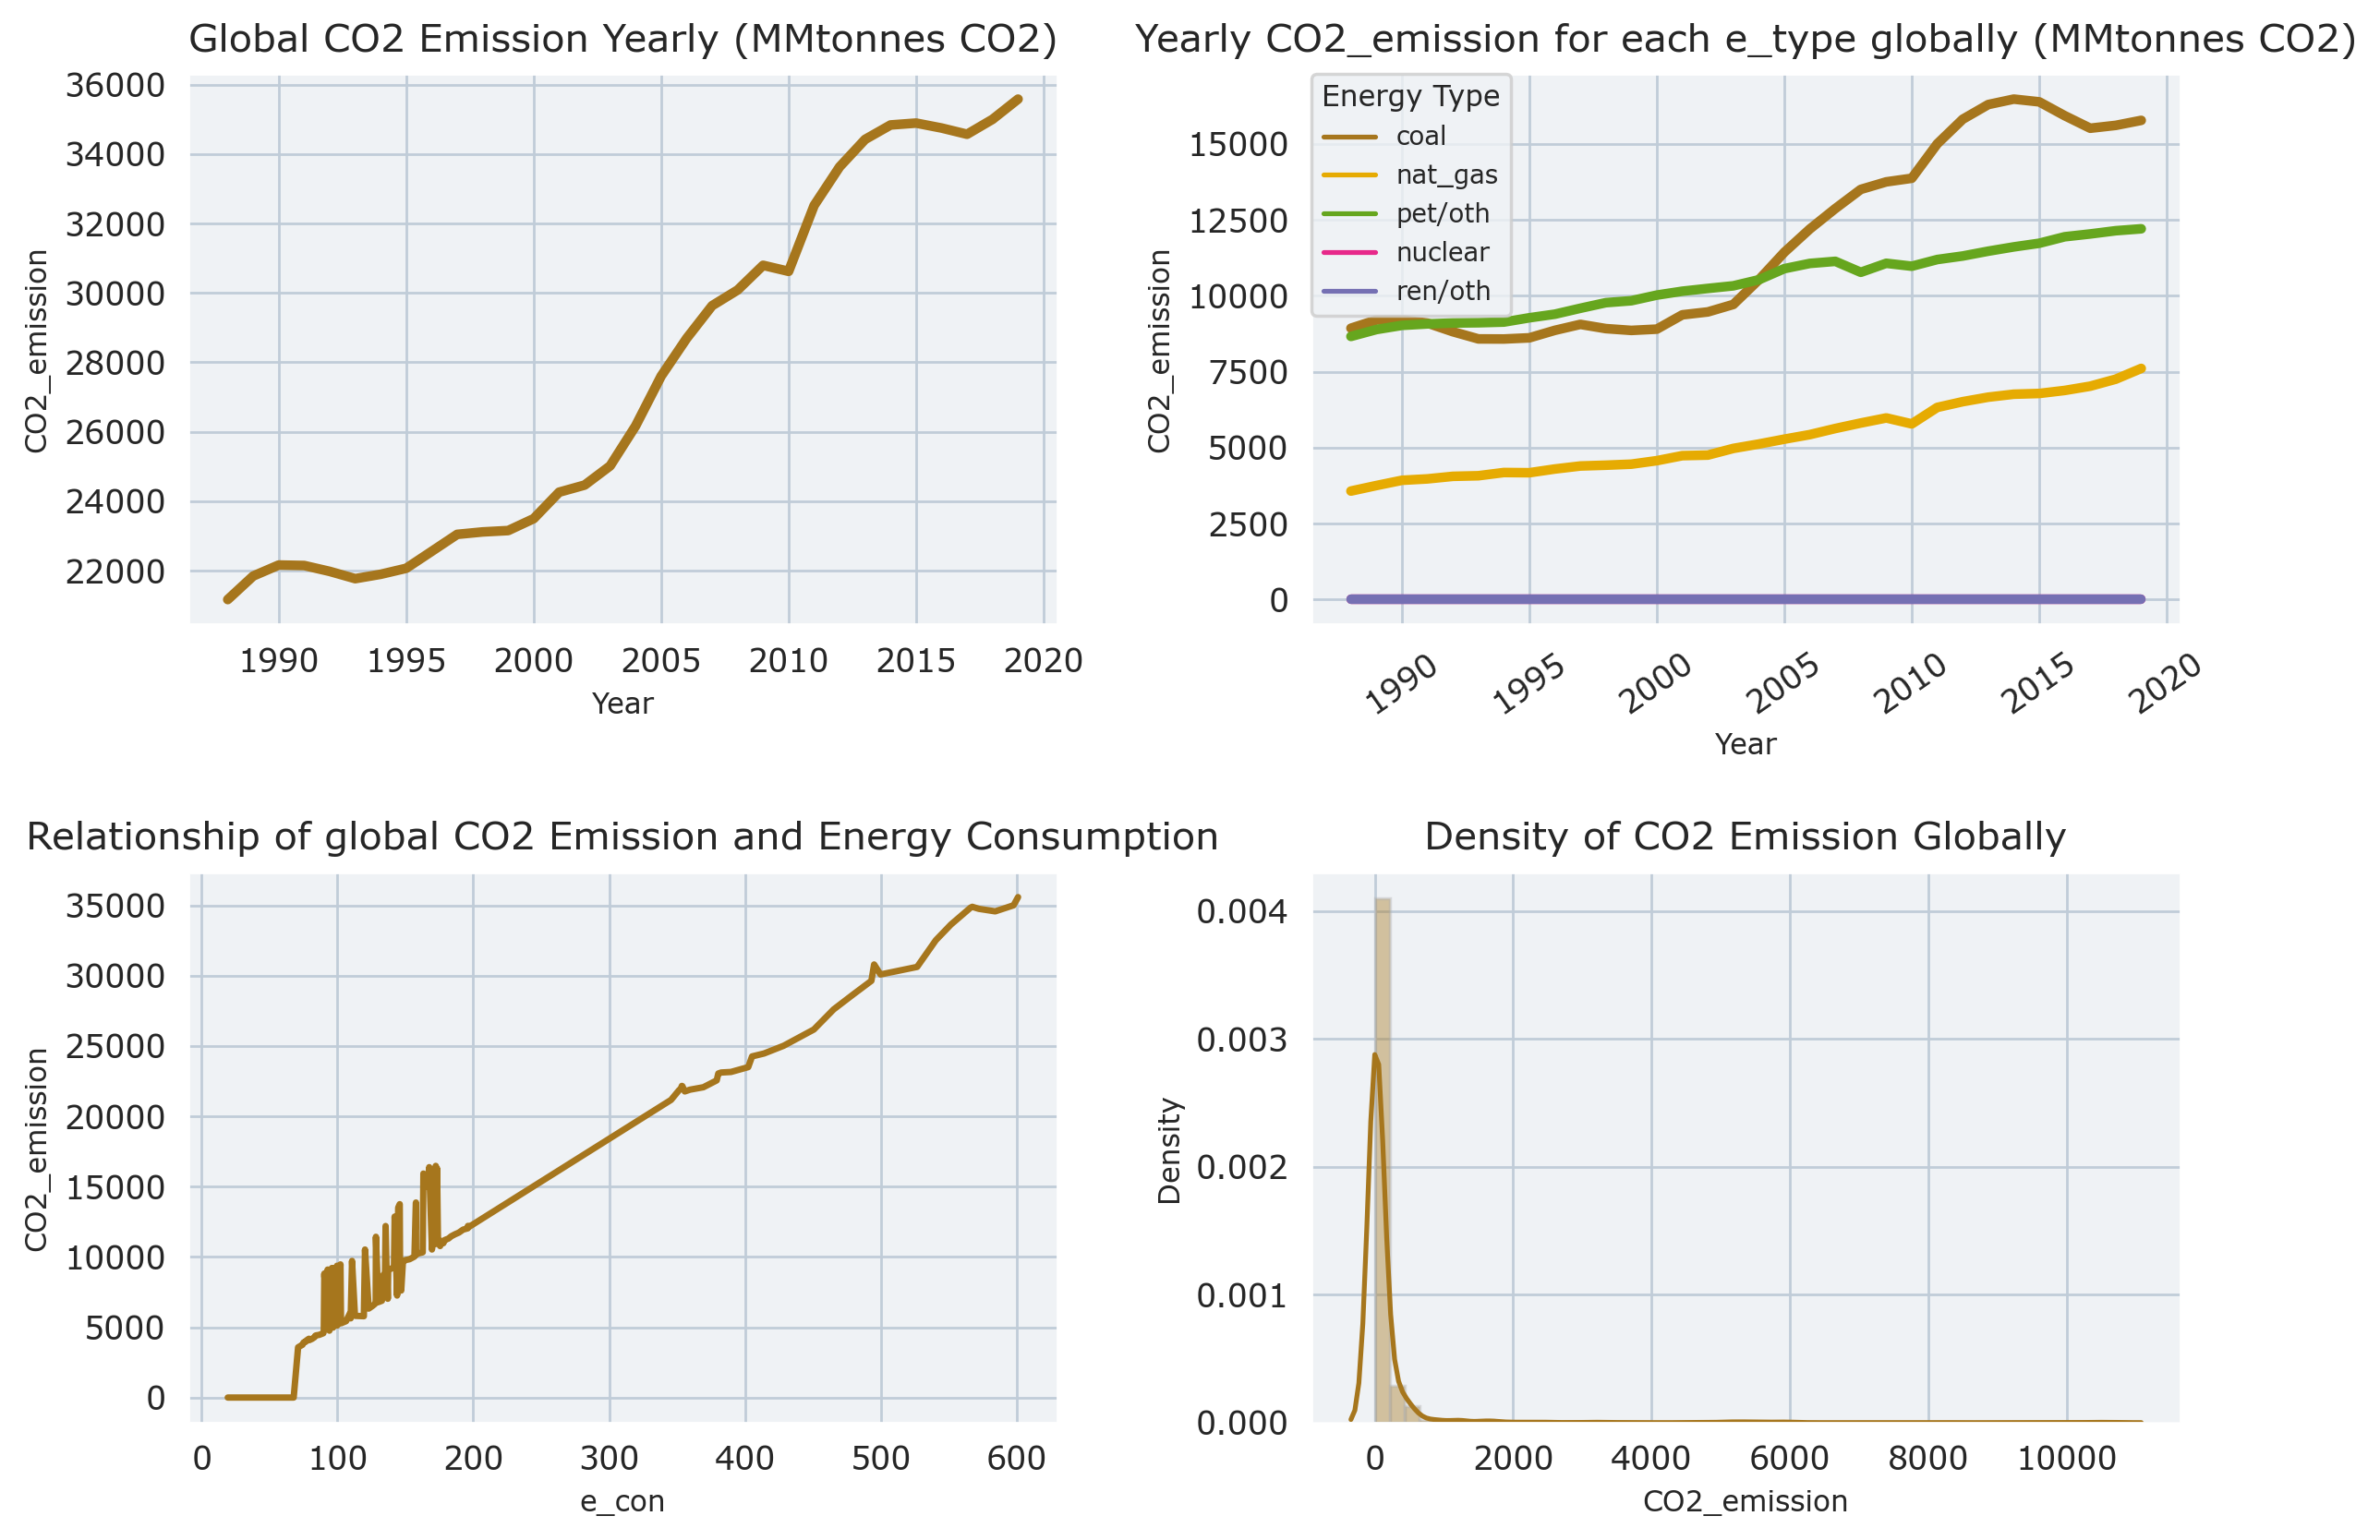

In [109]:
with plt.rc_context(rc = {'figure.dpi': 250, 'axes.labelsize': 9,
                          'xtick.labelsize': 10, 'ytick.labelsize': 10,
                          'legend.title_fontsize': 7, 'axes.titlesize': 12,
                          'axes.titlepad': 7}):

    # Data with only the 'World' values
    cd = df[df['Country']=='World']

    
    fig, ax = plt.subplots(2, 2, figsize = (10, 7), # constrained_layout = True,
                               gridspec_kw = {'width_ratios': [3, 3], 
                                                'height_ratios': [3, 3]})

    ax_flat = ax.flatten()

    
    ### 1st graph
    sns.lineplot(ax=ax_flat[0], data=cd[cd['e_type']=='all'],
                 x='Year', y='CO2_emission', lw=3).set_title('Global CO2 Emission Yearly (MMtonnes CO2)')

    
    ### 2nd graph
    sns.lineplot(ax=ax_flat[1], data=cd[cd['e_type']!='all'],
            x='Year',
            y='CO2_emission',
            hue='e_type',
            lw=3,
            ).set_title('Yearly CO2_emission for each e_type globally (MMtonnes CO2)')
    
    ax_flat[1].legend(fontsize=8, title='Energy Type', title_fontsize=9, loc='upper left', borderaxespad=0)
    ax_flat[1].tick_params(axis='x', rotation=35)
    
    
    ### 3rd graph
    sns.lineplot(ax=ax_flat[2], data=cd,
                x='e_con', y='CO2_emission', lw=2
               ).set_title('Relationship of global CO2 Emission and Energy Consumption')
    
    
    ### 4th graph
    for_dist = df[df['Country']!='World'][df['e_type']=='all']
    sns.distplot(for_dist['CO2_emission'], ax=ax_flat[3]).set_title('Density of CO2 Emission Globally')

    
    plt.tight_layout(pad = 1)
    plt.show()

**IMPORTANT TO KNOW** - This dataset shows for all Nuclear and Renewables/other energy types that they emit zero CO2 emissions, this technacially isnt true. They do emit CO2, but it is so insignificant that id be hard to notice, especially when measuring by million metric tonnes (MMtonnes CO2). Im only saying this because this dataset has zero set for the CO2 emission of both these energy types and that is somewhat misleading.

**CO2 Emission percentage rate increase/decrease**

In [110]:
# Specifying all countries == world, and e_type == all
cd0 = df[df['Country']=='World'][df['e_type']=='all'][['Year', 'CO2_emission']].reset_index(drop=True)

# For yearlly percentage change
temp_cd0 = cd0
temp_cd0['pct_change'] = temp_cd0['CO2_emission'].pct_change() * 100

# For overall percentage change
temp_cd02 = cd0

keep = [1988, 2019]
for year in temp_cd02['Year'].unique():
    if year not in keep:
        temp_cd02 = temp_cd02[temp_cd02['Year']!=year]
        
temp_cd02['pct_change'] = temp_cd02['CO2_emission'].pct_change() * 100

# Plotting figure
fig = px.area(temp_cd0, x='Year', y='pct_change', title='CO2 Emission percentage rate increase/decrease each year')
fig.show()

print(f'The average yearly percentage change is {round(temp_cd0["pct_change"].mean(), 2)}%,\n and the overall percentage change from 1988 to 2019 is {round(temp_cd02["pct_change"].sum(), 2)}%')

The average yearly percentage change is 1.71%,
 and the overall percentage change from 1988 to 2019 is 68.14%


CO2 Emission has been increasing 1.71% yearlly on average, and has overall increased by 68.14% over the entire time period.

**Yearly Mean, Median and Standard Deviation of each countries CO2 Emission**

In [111]:
# Dot chart showing yearlly mean, sd, and median
sample = df[df['Country']!='World'][df['e_type']=='all']

years = sample['Year'].unique()

# Mean
list_m = []
for year in years:
    amount = sample[sample['Year']==year]['CO2_emission'].mean()
    list_m.extend([[year, amount]])

temp_mean = pd.DataFrame(list_m, columns=['Year', 'co2_mean'])
temp_mean['co2_mean'] = round(temp_mean['co2_mean'], 2)


# Median
list_med = []
for year in years:
    amount = sample[sample['Year']==year]['CO2_emission'].median()
    list_med.extend([[year, amount]])

temp_med = pd.DataFrame(list_med, columns=['Year', 'co2_med'])
temp_med['co2_med'] = round(temp_med['co2_med'], 2)


# Standard Deviation
list_sd = []
for year in years:
    amount = sample[sample['Year']==year]['CO2_emission'].std()
    list_sd.extend([[year, amount]])

temp_sd = pd.DataFrame(list_sd, columns=['Year', 'co2_sd'])
temp_sd['co2_sd'] = round(temp_sd['co2_sd'], 2)


# Plotting
fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=temp_mean['Year'], y=temp_mean['co2_mean'], mode="lines+markers"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=temp_med['Year'], y=temp_med['co2_med'], mode="lines+markers"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=temp_sd['Year'], y=temp_sd['co2_sd'], mode="lines+markers"),
    row=3, col=1
)

fig.update_yaxes(title_text="mean", row=1, col=1)
fig.update_yaxes(title_text="median", row=2, col=1)
fig.update_yaxes(title_text="std", row=3, col=1)
fig.update_traces(textposition="bottom center")
fig.update_layout(height=700, width=900, title_text="Yearly mean, median and std each countries CO2 Emission (MMtonnes CO2)")
fig.show()


# Overall
overall = df[df['Country']=='World'][df['e_type']=='all']
print(f'The worlds Mean value of CO2 Emission over the entire time period is {round(overall["CO2_emission"].mean(), 2)}.')
print(f'The worlds Median value of CO2 Emission over the entire time period is {round(overall["CO2_emission"].median(), 2)}.')
print(f'The Standard Deviation value of CO2 Emission over the entire time period is {round(overall["CO2_emission"].std(), 2)}.')

The worlds Mean value of CO2 Emission over the entire time period is 27434.91.
The worlds Median value of CO2 Emission over the entire time period is 25592.93.
The Standard Deviation value of CO2 Emission over the entire time period is 5256.78.


**Who produced the most CO2 Emissions over this time period?**

In [112]:
# Making temp dataset of all countries and there total CO2 emissions in the time period

# Specifying all countreis != world, as well as all energy types
cd1 = df[df['Country']!='World'][df['e_type']=='all']

list = []

for country in cd1['Country'].unique():
    total = cd1[cd1['Country']==country]['CO2_emission'].sum(axis=0)
    list.extend([[country, total]])

    
# Temporary dataset of all the Countries and there respective total CO2 Emission over the time period
temp_cd = pd.DataFrame(list, columns=['Country', 'Total_CO2']).sort_values(by='Total_CO2',ascending=False)

# Plotting the top 20 Emiters
fig = px.bar(temp_cd.head(20), x='Country', y='Total_CO2', title='Top 20 CO2 Emitters (MMtonnes CO2)')
fig.show()

The top CO2 emitters are China and The US, both exceding nearly 4 times or more the amount of every other country!

**Choropleth**

In [113]:
cd2 = df[df['Country']!='World'][df['e_type']=='all']

temp_cd2 = cd2[['Country', 'Year', 'CO2_emission']].groupby(['Country','Year']).sum().reset_index()

px.choropleth(data_frame=temp_cd2, locations="Country", locationmode='country names', animation_frame="Year",
              color='CO2_emission', title="CO2 Emission of each country from 1988 to 2019 (MMtonnes CO2)")

If we remove China and The United States, we can get a better picture of the other high CO2 emitters around the world.

In [114]:
# Without China and the US

temp5 = df[df['Country']!='World'][df['e_type']=='all']
temp5 = temp5[temp5['Country']!='United States']
temp5 = temp5[temp5['Country']!='China']

temp_temp5 = temp5[['Country', 'Year', 'CO2_emission']].groupby(['Country','Year']).sum().reset_index()

px.choropleth(data_frame=temp_temp5, locations="Country", locationmode='country names', animation_frame="Year",
              color='CO2_emission', title="CO2 Emission of each country from 1988 to 2019 (MMtonnes CO2)")

After removing China and the United States, we can now see some of the other big emitters including Russia, Japan, India and Germany.

**Yearly CO2 emissions of top 6 Countries over the time period**

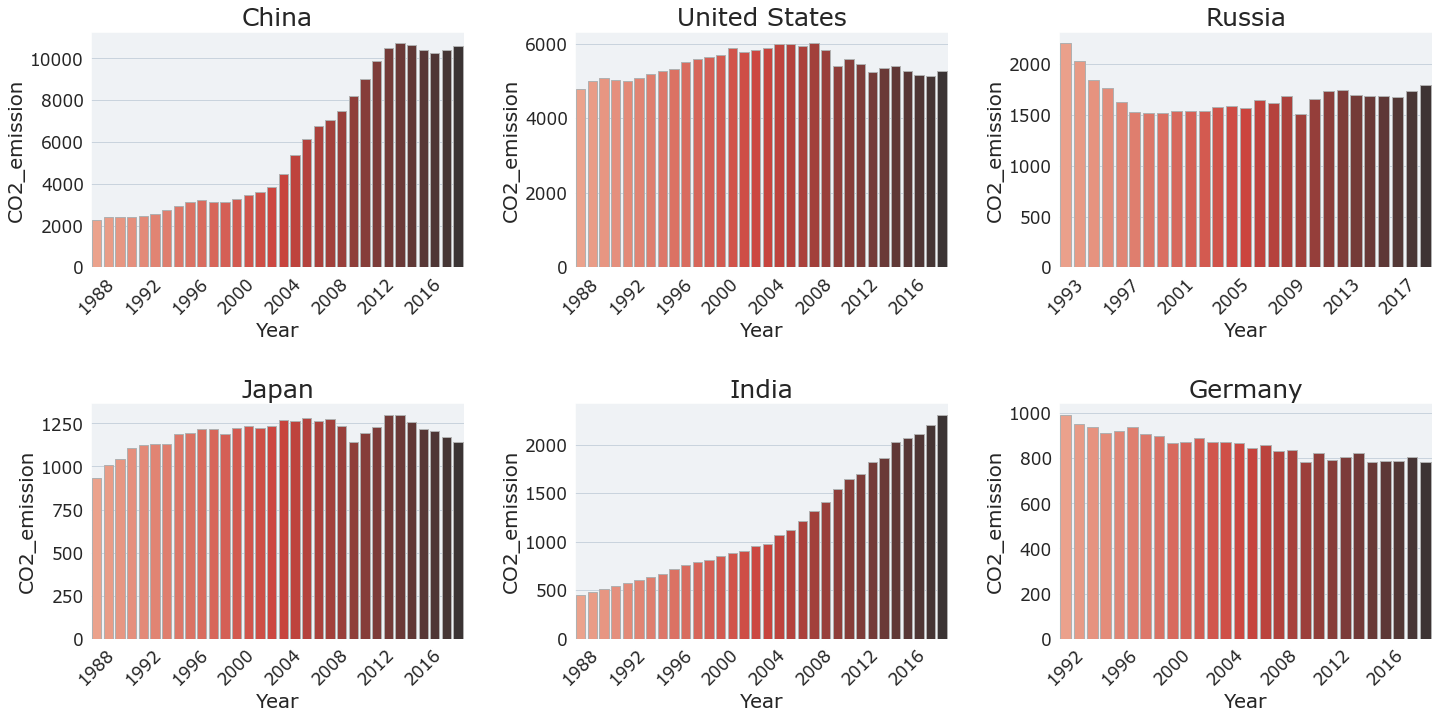

In [115]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10))


# Top 6 Countries
countries = temp_cd['Country'].head(6)
    
# Average CO2 Emission each year for top 6 emiters
for idx, (country, axes) in enumerate(zip(countries, ax.flatten())):
        
    cd3 = df[df['Country']==country][df['e_type']=='all']
    temp_data = cd3.groupby(['Year'])['CO2_emission'].sum().reset_index().sort_values(by='CO2_emission',ascending=False)
    plot_ = sns.barplot(ax=axes, data=temp_data, x='Year', y='CO2_emission', palette="Reds_d")
    
    # Title
    axes.set_title(country)
    
    # Reducing Density of X-ticks
    for ind, label in enumerate(plot_.get_xticklabels()):
        if ind % 4 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    
    # Rotating X axis
    for tick in axes.get_xticklabels():
        tick.set_rotation(45)
    
    
### Removing empty figures
else:
    [axes.set_visible(False) for axes in ax.flatten()[idx + 1:]]
    

    
plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
plt.show()

China and India have increased there emissions a lot over the time period.

**Countries with the most drastic increase/decrease in CO2 emission from the start to end of this time period**

First creating dataset below.

In [116]:
# Total CO2 emission for each country
cd4 = df[df['Country']!='World'][df['e_type']=='all'].reset_index(drop=True)

countries = cd4['Country'].unique()

list_cont = []
list_start = []
list_end = []
for cont in countries:
    
    
    # Start date, default 1988 if created before time period
    start_date = cd4[cd4['Country']==cont]['Year'].min()
    # End date, default 2019 if still around
    end_date = cd4[cd4['Country']==cont]['Year'].max()
    
    # CO2 emissions of both the beggining and end every country within the timeperiod
    start_CO2 = float(cd4[cd4['Country']==cont][cd4['Year']==start_date]['CO2_emission'])
    end_CO2 = float(cd4[cd4['Country']==cont][cd4['Year']==end_date]['CO2_emission'])

    list_start.extend([start_CO2])
    list_end.extend([end_CO2])
    list_cont.extend([cont])

# Adding all lists into a dict
d = {'Country':list_cont, 'Start':list_start, 'End':list_end}

start_end = pd.DataFrame(d)

# Creating new column for the total difference from the start to end
start_end['Difference'] = start_end['End'] - start_end['Start']

# Sorting values by difference
start_end = start_end.sort_values(by='Difference', ascending=False).reset_index(drop=True)

start_end

,Country,Start,End,Difference
0,China,2259.81,10608.60,8348.79
1,India,446.21,2308.33,1862.12
2,United States,4775.55,5277.19,501.64
3,South Korea,207.60,702.96,495.36
4,Iran,165.31,642.96,477.65
...,...,...,...,...
188,Romania,190.58,73.68,-116.90
189,United Kingdom,608.72,411.17,-197.55
190,Germany,993.23,781.60,-211.63
191,Ukraine,594.18,202.51,-391.67


Then plotting

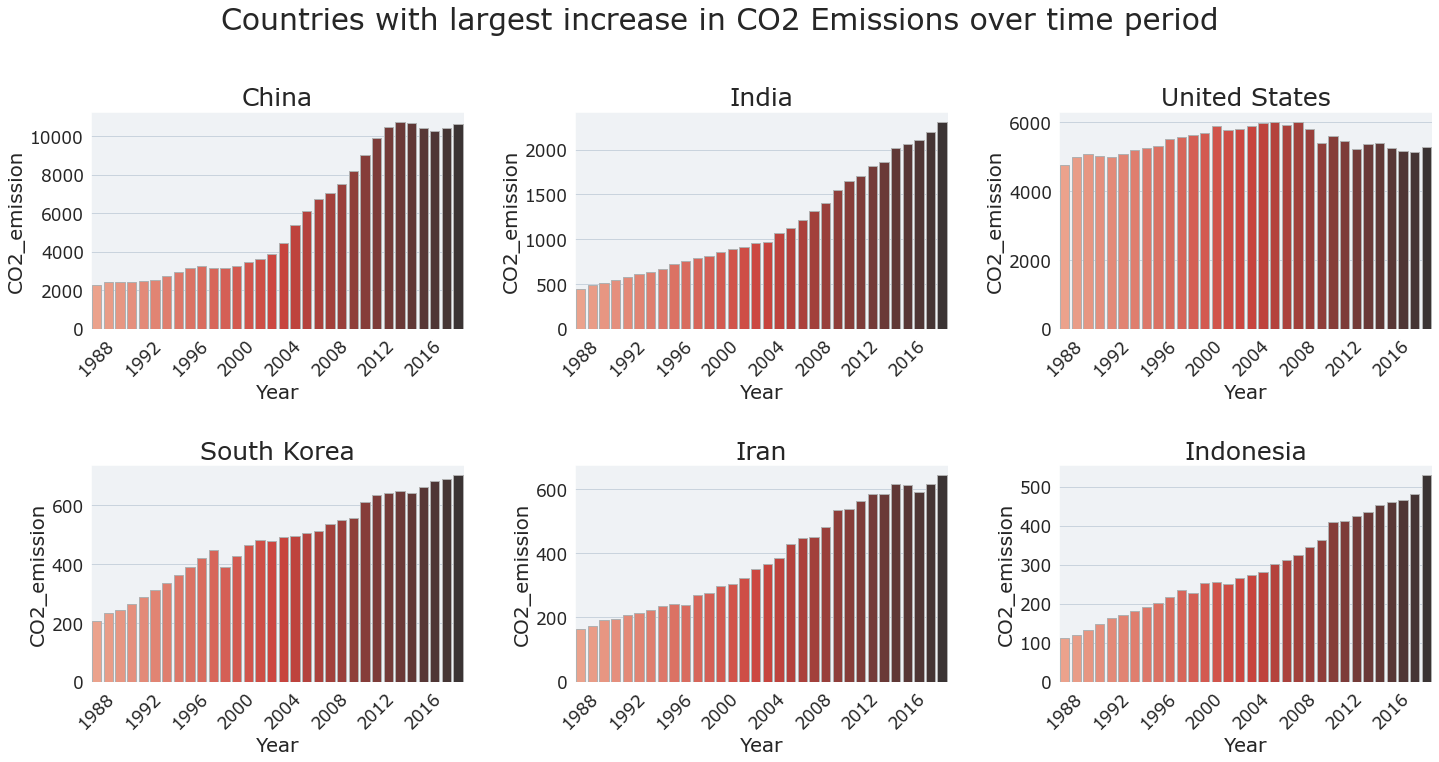

In [117]:
# Countries with biggest increase in CO2 emission
fig, ax = plt.subplots(2, 3, figsize = (20, 10))

# Countries with the biggest increase in CO2 emission
countries = start_end['Country'].head(6).to_list()

for idx, (country, axes) in enumerate(zip(countries, ax.flatten())):
        
    cd5 = df[df['Country']==country][df['e_type']=='all']
    temp_cd5 = cd5.groupby(['Year'])['CO2_emission'].sum().reset_index().sort_values(by='CO2_emission',ascending=False)
    plot_ = sns.barplot(ax=axes, data=temp_cd5, x='Year', y='CO2_emission', palette="Reds_d")
    
    # Title
    axes.set_title(country)
    
    # Reducing Density of X-ticks
    for ind, label in enumerate(plot_.get_xticklabels()):
        if ind % 4 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    
    # Rotating X axis
    for tick in axes.get_xticklabels():
        tick.set_rotation(45)
    
    
### Removing empty figures
else:
    [axes.set_visible(False) for axes in ax.flatten()[idx + 1:]]
    

plt.suptitle('Countries with largest increase in CO2 Emissions over time period', y=1.05, size=30)
plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
plt.show()

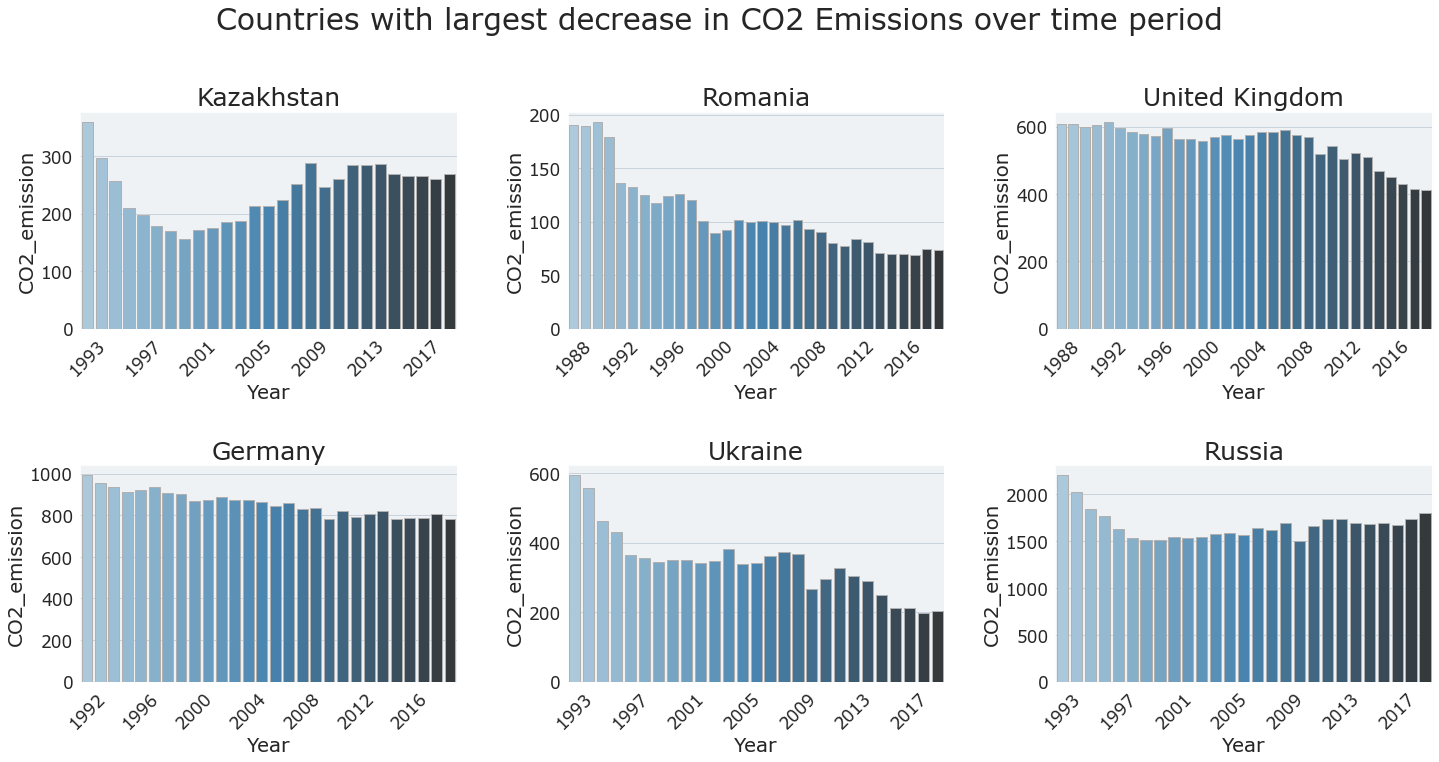

In [118]:
# Countries with biggest decrease in CO2 emission
fig, ax = plt.subplots(2, 3, figsize = (20, 10))

# Countries with the biggest decrease in CO2 emission
countries = start_end['Country'].tail(6).to_list()

for idx, (country, axes) in enumerate(zip(countries, ax.flatten())):
        
    cd6 = df[df['Country']==country][df['e_type']=='all']
    temp_data = cd6.groupby(['Year'])['CO2_emission'].sum().reset_index().sort_values(by='CO2_emission',ascending=False)
    plot_ = sns.barplot(ax=axes, data=temp_data, x='Year', y='CO2_emission', palette="Blues_d")
    
    # Title
    axes.set_title(country)
    
    # Reducing Density of X-ticks
    for ind, label in enumerate(plot_.get_xticklabels()):
        if ind % 4 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    
    # Rotating X axis
    for tick in axes.get_xticklabels():
        tick.set_rotation(45)
    
    
### Removing empty figures
else:
    [axes.set_visible(False) for axes in ax.flatten()[idx + 1:]]
    

plt.suptitle('Countries with largest decrease in CO2 Emissions over time period', y=1.05, size=30)
plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
plt.show()  

The countries with the largest decrease in CO2 Emission are all moslty former soviet republics, I assume after the USSR fell there production/industry fell drastically, which in return decreased there emissions. Germany (technically apart of USSR, techinically not) and The United Kingdom have also decreased there emissions quite a bit over the time period.

**Top Countries with the largest Population and there CO2 emissions as of 2019**

In [119]:
cd9 = df[df['Country']!='World'][df['Year']==2019][df['e_type']=='all']

# Sorting GDP from largest to smallest
cd9 = cd9.sort_values(['Population'], ascending=False).reset_index(drop=True)

# Showing the top 10 countries
cd9[['Country', 'Year', 'Population', 'CO2_emission']].head(10)

,Country,Year,Population,CO2_emission
0,China,2019,1434512.0,10608.60
1,India,2019,1368140.0,2308.33
2,United States,2019,330043.8,5277.19
3,Indonesia,2019,270984.0,529.40
4,Pakistan,2019,216564.0,192.90
5,Brazil,2019,211246.2,453.44
6,Nigeria,2019,201050.8,101.19
7,Bangladesh,2019,163021.0,90.78
8,Russia,2019,145876.3,1798.24
9,Mexico,2019,127745.8,456.15


In [120]:
# Plotting Bubble Chart

# Capturing country names
countries = cd9['Country'].unique()


# Creating hover stats
hover_text = []
bubble_size = []

for index, row in cd9.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Population: {pop}<br>'+
                      'CO2 Emission: {co2}<br>'
                      ).format(country=row['Country'],
                                            pop=row['Population'],
                                            co2=row['CO2_emission']))
    
    bubble_size.append(math.sqrt(row['CO2_emission']))
        
        
cd9['text'] = hover_text
cd9['size'] = bubble_size
sizeref = 15.*max(cd9['size'])/(100**2)


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=cd9['Population'], y=cd9['CO2_emission'],
    name=country, text=cd9['text'],
    marker_size=cd9['size'],
    ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

# Adding titles
fig.update_layout(
    title='CO2 Eimission of top countries with largest Population as of 2019',
    xaxis=dict(
        title='Population (MPerson)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='CO2 Emission (MMtonnes CO2)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig.show()

Generally speaking, the larger the population, the more CO2 the country will be likely to emit.

**Top Countries with the highest GDP and lowest CO2 emissions as of 2019 (Best economy with lowest polution)**

In [121]:
cd5 = df[df['Country']!='World'][df['Year']==2019][df['e_type']=='all']

# Sorting GDP from largest to smallest
cd5 = cd5.sort_values(['GDP'], ascending=False).reset_index(drop=True)

# Showing the top 10 countries
cd5[['Country', 'Year', 'GDP', 'CO2_emission']].head(10)

,Country,Year,GDP,CO2_emission
0,China,2019,23128.34,10608.60
1,United States,2019,19925.43,5277.19
2,India,2019,9310.29,2308.33
3,Japan,2019,5359.05,1140.95
4,Germany,2019,4182.05,781.60
5,Russia,2019,3770.42,1798.24
6,Indonesia,2019,3227.67,529.40
7,Brazil,2019,3041.30,453.44
8,United Kingdom,2019,2992.82,411.17
9,France,2019,2918.62,341.98


In [122]:
# Plotting Bubble Chart

# Capturing country names
countries = cd5['Country'].unique()


# Creating hover stats
hover_text = []
bubble_size = []

for index, row in cd5.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'GDP: {gdp}<br>'+
                      'CO2 Emission: {co2}<br>'
                      ).format(country=row['Country'],
                                    gdp=row['GDP'],
                                    co2=row['CO2_emission']))
    
    bubble_size.append(math.sqrt(row['GDP']))
                      

cd5['text'] = hover_text
cd5['size'] = bubble_size
sizeref = 19.*max(cd5['size'])/(100**2)


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=cd5['GDP'], y=cd5['CO2_emission'],
    name=country, text=cd5['text'],
    marker_size=cd5['size'],
    ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

# Adding titles
fig.update_layout(
    title='CO2 Eimission of top countries with largest GDP as of 2019',
    xaxis=dict(
        title='GDP (Billion 2015$ PPP)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='CO2 Emission (MMtonnes CO2)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig.show()

The larger the GDP, the more likely of there being a high CO2 emission.

**Top Countries with the lowest Energy Intensity of GDP and there CO2 emissions as of 2019 (Best energy conservation with lowest polution)**

In [123]:
cd6 = df[df['Country']!='World'][df['Year']==2019][df['e_type']=='all']

# Sorting GDP from largest to smallest
cd6 = cd6.sort_values(['ei_gdp'], ascending=False).reset_index(drop=True)

# Showing the top 10 countries
cd6[['Country', 'Year', 'ei_gdp', 'CO2_emission']]

,Country,Year,ei_gdp,CO2_emission
0,Turkmenistan,2019,17.70,97.31
1,Venezuela,2019,12.87,131.49
2,Bahrain,2019,11.54,39.01
3,Iran,2019,10.97,642.96
4,Laos,2019,9.84,29.95
...,...,...,...,...
188,Sierra Leone,2019,1.02,0.99
189,Chad,2019,1.01,1.72
190,Zambia,2019,0.84,7.10
191,Rwanda,2019,0.80,1.11


In [124]:
# Plotting Bubble Chart

# Capturing country names
countries = cd6['Country'].unique()


# Creating hover stats
hover_text = []
bubble_size = []

for index, row in cd6.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'ei_gdp: {ei_gdp}<br>'+
                      'CO2 Emission: {co2}<br>'
                      ).format(country=row['Country'],
                                            ei_gdp=row['ei_gdp'],
                                            co2=row['CO2_emission']))
    
    bubble_size.append(math.sqrt(row['CO2_emission']))
        
        
cd6['text'] = hover_text
cd6['size'] = bubble_size
sizeref = 15.*max(cd6['size'])/(100**2)


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=cd6['ei_gdp'], y=cd6['CO2_emission'],
    name=country, text=cd6['text'],
    marker_size=cd6['size'],
    ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

# Adding titles
fig.update_layout(
    title='CO2 Eimission of top countries with largest Energy Intensity by GDP as of 2019',
    xaxis=dict(
        title='Energy Intensity by GDP (1000 Btu/2015$ GDP PPP)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='CO2 Emission (MMtonnes CO2)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig.show()

A low/high Energy Intensity by GDP isnt necesarily predictive of a large CO2 Emission.

**Top Countries with the largest Energy Intensity per Capita and there CO2 emissions (Best energy conservation per capita with lowest polution)**

In [125]:
cd7 = df[df['Country']!='World'][df['Year']==2019][df['e_type']=='all']

# Sorting GDP from largest to smallest
cd7 = cd7.sort_values(['ei_capita'], ascending=False).reset_index(drop=True)

# Showing the top 10 countries
cd7[['Country', 'Year', 'ei_capita', 'CO2_emission']].head(10)

,Country,Year,ei_capita,CO2_emission
0,Qatar,2019,723.58,105.34
1,Singapore,2019,639.95,244.06
2,Bahrain,2019,547.98,39.01
3,United Arab Emirates,2019,471.79,274.04
4,Brunei,2019,415.18,10.23
5,Canada,2019,398.34,613.09
6,Kuwait,2019,382.71,92.89
7,Norway,2019,333.83,38.06
8,Turkmenistan,2019,330.62,97.31
9,Luxembourg,2019,310.07,11.17


In [126]:
# Plotting Bubble Chart

# Capturing country names
countries = cd7['Country'].unique()


# Creating hover stats
hover_text = []
bubble_size = []

for index, row in cd7.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'ei_capita: {ei_capita}<br>'+
                      'CO2 Emission: {co2}<br>'
                      ).format(country=row['Country'],
                                            ei_capita=row['ei_capita'],
                                            co2=row['CO2_emission']))
    
    bubble_size.append(math.sqrt(row['CO2_emission']))
        
        
cd7['text'] = hover_text
cd7['size'] = bubble_size
sizeref = 15.*max(cd7['size'])/(100**2)


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=cd7['ei_capita'], y=cd7['CO2_emission'],
    name=country, text=cd7['text'],
    marker_size=cd7['size'],
    ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

# Adding titles
fig.update_layout(
    title='CO2 Eimission of top countries with largest Energy Intensity per capita as of 2019',
    xaxis=dict(
        title='Energy Intensity per capita (MMBtu/person)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='CO2 Emission (MMtonnes CO2)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig.show()

A low/high Energy Intensity per capita isnt necesarily predictive of a large CO2 Emission.

**Top Countries with the largest Energy Consumption and there CO2 emissions**

In [127]:
cd8 = df[df['Country']!='World'][df['Year']==2019][df['e_type']=='all']

# Sorting GDP from largest to smallest
cd8 = cd8.sort_values(['e_con'], ascending=False)
# Grabbing top 50
cd8 = cd8.iloc[:100]

# Showing the top 10 countries
cd8[['Country', 'Year', 'e_con', 'CO2_emission']].head(10)

,Country,Year,e_con,CO2_emission
34992,China,2019,151.61,10608.60
35868,United States,2019,100.43,5277.19
35616,Russia,2019,33.25,1798.24
35238,India,2019,31.78,2308.33
35286,Japan,2019,18.98,1140.95
34962,Canada,2019,14.98,613.09
35166,Germany,2019,13.53,781.60
34902,Brazil,2019,12.56,453.44
35724,South Korea,2019,12.41,702.96
35250,Iran,2019,12.06,642.96


In [128]:
# Plotting Bubble Chart

# Capturing country names
countries = cd8['Country'].unique()


# Creating hover stats
hover_text = []
bubble_size = []

for index, row in cd8.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Consumption: {con}<br>'+
                      'CO2 Emission: {co2}<br>'
                      ).format(country=row['Country'],
                                            con=row['e_con'],
                                            co2=row['CO2_emission']))
    
    bubble_size.append(math.sqrt(row['CO2_emission']))
        
        
cd8['text'] = hover_text
cd8['size'] = bubble_size
sizeref = 15.*max(cd8['size'])/(100**2)


fig = go.Figure()


#for country in countries:
#    fig.add_trace(go.Scatter(
#        x=cd5['GDP'], y=cd5['CO2_emission'],
#        name=country, text=cd5['text'],
#        marker_size=cd5['size'],
#        ))


fig.add_trace(go.Scatter(
    x=cd8['e_con'], y=cd8['CO2_emission'],
    name=country, text=cd8['text'],
    marker_size=cd8['size'],
    ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

# Adding titles
fig.update_layout(
    title='CO2 Eimission of top countries with largest Energy Consumption as of 2019',
    xaxis=dict(
        title='Energy Consumption (quad Btu)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='CO2 Emission (MMtonnes CO2)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig.show()

This is sortove obvious, but the more Energy Consumption of a country, the larger there CO2 emission will be.

<a id=4></a>

**Conclusion on CO2 Emission**
 * CO2 Emission has been increasing throughout the time period.
 * Coal and Petroleum/other liquids have been the dominant energy source for this time period.
 * CO2 Emission has been icreasing 1.71% yearlly on average, and has overall increased by 68.14% over the entire time period.
 * As of 2019, the average CO2 emission emitted was 10.98 (MMtonnes CO2) for the year.
 * The top CO2 emitters over the entire time period have been China and The United States, both exceding nearlly 4x or more the amount of every other country.
 * Throughout the time period, China and India have increased there CO2 Emissions the most out of every other country.
 * Throughout the time period, Former soviet republics have had the largest decrease in CO2 emission, The United Kingdom and Germany have also decreased there emissions a bit as well.
 * Generally speaking, the larger the population, the more CO2 the country will be likely to emit.
 * The larger the GDP, the more likely the country will have a high CO2 emission.
 * The larger the Energy Consumption of a country, the larger the CO2 emission.
 * A high or low Energy Intensity by GDP of Energy Intensity per capita isnt necesarilly predictive of a large CO2 emission, but generally speaking the lower it is the better (the more energy conserved means less CO2 emitted).

### This notebook is a work in process!

Bilding on this analysis, let's proceed to trying to writing an Machine Learning model which predicts accurately the CO2 emission given some of the base data such as population and GDP

# Base ML Development

In [69]:
df.head()

,Country,e_type,Year,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,CO2_emission
0,World,all,1988,345.56,347.41,42106.6,4927545.08,70.13,8.21,21163.84
1,World,coal,1988,96.87,98.48,42106.6,4927545.08,70.13,8.21,8930.92
2,World,nat_gas,1988,71.01,71.85,42106.6,4927545.08,70.13,8.21,3571.68
3,World,pet/oth,1988,133.45,132.49,42106.6,4927545.08,70.13,8.21,8661.24
4,World,nuclear,1988,19.23,19.23,42106.6,4927545.08,70.13,8.21,0.00


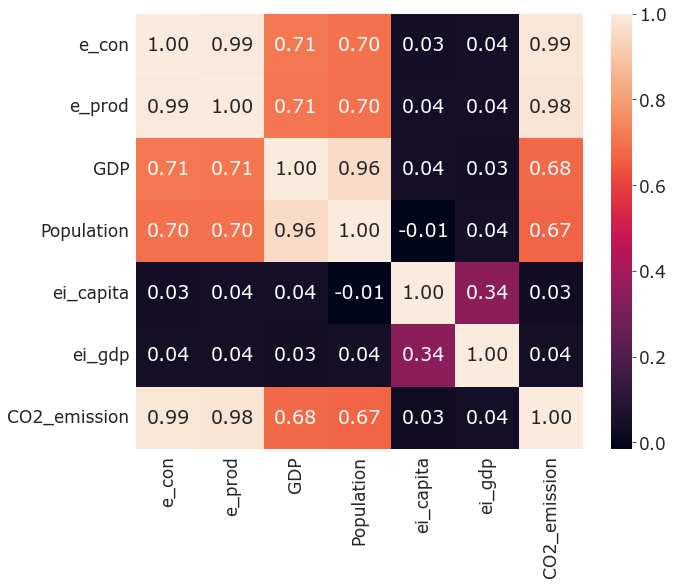

In [70]:
# Plot Correlation HeatMap btw Features
plt.figure(figsize=(10,8))
sns.heatmap(data=df.iloc[:,3:].corr(), annot=True, fmt='.2f')
plt.show()

In [71]:
# Drop Country and Year
ready = df.drop(['Country', 'Year'], axis=1)
ready.head(2)

,e_type,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,CO2_emission
0,all,345.56,347.41,42106.6,4927545.08,70.13,8.21,21163.84
1,coal,96.87,98.48,42106.6,4927545.08,70.13,8.21,8930.92


it's obvious that the behaviour of our model will greatly differ per energy type; Hence we will be building different ML models per energy type

In [72]:
# List Energy Types
energy_types = ready['e_type'].unique().tolist()
energy_types

['all', 'coal', 'nat_gas', 'pet/oth', 'nuclear', 'ren/oth']

In [73]:
# Encoding The Energy Types
ready["e_type"].replace({"all": 0, "coal": 1, "nat_gas": 2, 
                         "pet/oth": 3, "nuclear": 4, "ren/oth": 5}, inplace=True)

In [74]:
# Review
ready.head(20)

,e_type,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,CO2_emission
0,0,345.56,347.41,42106.60,4927545.08,70.13,8.21,21163.84
1,1,96.87,98.48,42106.60,4927545.08,70.13,8.21,8930.92
2,2,71.01,71.85,42106.60,4927545.08,70.13,8.21,3571.68
3,3,133.45,132.49,42106.60,4927545.08,70.13,8.21,8661.24
4,4,19.23,19.23,42106.60,4927545.08,70.13,8.21,0.00
5,5,24.93,25.36,42106.60,4927545.08,70.13,8.21,0.00
6,0,0.11,0.12,37.70,11618.00,9.57,2.95,3.65
7,1,0.00,0.00,37.70,11618.00,9.57,2.95,0.32
8,2,0.07,0.11,37.70,11618.00,9.57,2.95,1.22
9,3,0.03,0.00,37.70,11618.00,9.57,2.95,2.10


In [75]:
# Check shape if we have sufficient rep. data to model & Test with.
ready.shape

(35922, 8)

In [76]:
# Create a copy of Dataframe
all_en_df = ready.copy()

In [77]:
# # Get Df Per Energy Type as we will be building ML to predict emission per energy type
# all_en_df = ready[ready.e_type == 'all']
# all_en_df = all_en_df.drop(['e_type'], axis=1)

# coal_en_df = ready[ready.e_type == 'coal']
# coal_en_df = coal_en_df.drop(['e_type'], axis=1)

# nat_gas_en_df = ready[ready.e_type == 'nat_gas']
# nat_gas_en_df = nat_gas_en_df.drop(['e_type'], axis=1)

# po_en_df = ready[ready.e_type == 'pet/oth']
# po_en_df = po_en_df.drop(['e_type'], axis=1)

# nu_ren_en_df = ready[ready['e_type'].isin(['nuclear', 'ren/oth']) ]
# nu_ren_en_df = nu_ren_en_df.drop(['e_type'], axis=1).head(2)

In [78]:
# Import Modelling Lib
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler        # For standardizing features

# Libraries for Model Building
from sklearn.model_selection import train_test_split    # To split the data into training and testing data
from sklearn.linear_model import LinearRegression       # For the LINEAR Model from Sklearn
from sklearn.linear_model import Ridge                  # For the RIDGE Regression module from sklearn
from sklearn.linear_model import Lasso                  # For the LASSO Model from Sklearn
from sklearn.model_selection import GridSearchCV        # To sort out our Hyper_Parameters
import xgboost as xgb                                   # For the xgBoost Model

# Libraries for calculating performance metrics
from sklearn import metrics                             # for checking performance
from sklearn.metrics import r2_score                    # for checking R-squared Error

# Libraries to Save/Restore Models
import pickle

# Model Predicting Emission for All Energies

In [79]:
# View DF
all_en_df.head(2)

,e_type,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,CO2_emission
0,0,345.56,347.41,42106.6,4927545.08,70.13,8.21,21163.84
1,1,96.87,98.48,42106.6,4927545.08,70.13,8.21,8930.92


In [80]:
# Check Comprehensive Info about DF
all_en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35922 entries, 0 to 35921
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   e_type        35922 non-null  int64  
 1   e_con         35922 non-null  float64
 2   e_prod        35922 non-null  float64
 3   GDP           35922 non-null  float64
 4   Population    35922 non-null  float64
 5   ei_capita     35922 non-null  float64
 6   ei_gdp        35922 non-null  float64
 7   CO2_emission  35922 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 2.2 MB


No missing values & Features are in numeric format suitable for an Advanced Regression Modeling.

In [81]:
# create scaler object
scaler = StandardScaler()
# convert the scaled predictor values into a dataframe
all_df = pd.DataFrame(scaler.fit_transform(all_en_df),columns = all_en_df.columns)

In [82]:
# Extracting features and label 
X_all = all_df.drop(['CO2_emission'], axis=1)
y_all = all_df['CO2_emission']

# split data
x_all_train, x_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, shuffle=False, random_state=42)

In [83]:
# create one or more ML models

# Create linear model
lm_all = LinearRegression()

# Create ridge model
ridge_all = Ridge()

# Create LASSO model object, setting alpha to 0.01
lasso_all = Lasso(alpha=0.01) 
# Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square

#create Xgboost
xg_reg_all = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.6, learning_rate = 0.1,
                max_depth = 5, alpha = 6, n_estimators = 100, subsample = 0.7) 

In [84]:
# Fit the Ml model
lm_all.fit(x_all_train, y_all_train)
ridge_all.fit(x_all_train, y_all_train)
lasso_all.fit(x_all_train, y_all_train)
xg_reg_all.fit(x_all_train, y_all_train)

XGBRegressor(alpha=6, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=6, ...)

In [85]:
# evaluate one or more ML models [Train Predictions]
train_ridge_all = ridge_all.predict(x_all_train)
train_lm_all = lm_all.predict(x_all_train)
train_lasso_all = lasso_all.predict(x_all_train)
xgboost_all = xg_reg_all.predict(x_all_train)

In [86]:
# Make TEST set predictions for each model
test_lm_all = lm_all.predict(x_all_test)
test_ridge_all = ridge_all.predict(x_all_test)
test_lasso_all = lasso_all.predict(x_all_test)
test_xgboost_all = xg_reg_all.predict(x_all_test)

In [87]:
# Compare model performance
results_dict_all = {'Training RMSE':
                    {    # RMSE between Train Target variable and Predicted Training Target variable
                        'linear Model': round(np.sqrt(metrics.mean_squared_error(y_all_train, train_lm_all)), 2),
                        'Ridge': round(np.sqrt(metrics.mean_squared_error(y_all_train, train_ridge_all)), 2),
                        'LASSO': round(np.sqrt(metrics.mean_squared_error(y_all_train, train_lasso_all)), 2),
                        'Xgboost Model': round(np.sqrt(metrics.mean_squared_error(y_all_train, xgboost_all)), 2)
                    },  
                    
#                     'Testing RMSE':
#                     {    # RMSE between Test Target variable and Predicted Test Target variable
#                         'linear Model': round(np.sqrt(metrics.mean_squared_error(y_all_test, test_lm_all)), 2),
#                         'Ridge': round(np.sqrt(metrics.mean_squared_error(y_all_test, test_ridge_all)), 2),
#                         'LASSO': round(np.sqrt(metrics.mean_squared_error(y_all_test, test_lasso_all)), 2),
#                         'Xgboost Model': round(np.sqrt(metrics.mean_squared_error(y_all_test, test_xgboost_all)), 2)
#                     },
                    
                    'Training MSE':
                    {
                        'linear Model': round(metrics.mean_squared_error(y_all_train, train_lm_all), 2),
                        'Ridge': round(metrics.mean_squared_error(y_all_train, train_ridge_all), 2),
                        "LASSO": round(metrics.mean_squared_error(y_all_train, train_lasso_all), 2),
                        'Xgboost Model': round(metrics.mean_squared_error(y_all_train, xgboost_all), 2)
                    },                     
                    'Test MSE':
                    {
                        'linear Model': round(metrics.mean_squared_error(y_all_test, test_lm_all), 2),
                        "Ridge": round(metrics.mean_squared_error(y_all_test, test_ridge_all), 2),
                        "LASSO": round(metrics.mean_squared_error(y_all_test, test_lasso_all), 2),
                        "Xgboost Model": round(metrics.mean_squared_error(y_all_test, test_xgboost_all), 2)
                    },
                 
                 }

# Convert result to df
result_all = pd.DataFrame.from_dict({(i,j): results_dict_all[i][j] 
                           for i in results_dict_all.keys() 
                           for j in results_dict_all[i].keys()},
                       orient='index')
rmse_all = result_all.head(4)
mse_all = result_all.tail(8)

In [88]:
rmse_all.T

,"(Training RMSE, linear Model)","(Training RMSE, Ridge)","(Training RMSE, LASSO)","(Training RMSE, Xgboost Model)"
0,0.15,0.15,0.15,0.04


A perfect RMSE value is 0.0, which means that all predictions matched the expected values exactly.

In [89]:
mse_all.T

,"(Training MSE, linear Model)","(Training MSE, Ridge)","(Training MSE, LASSO)","(Training MSE, Xgboost Model)","(Test MSE, linear Model)","(Test MSE, Ridge)","(Test MSE, LASSO)","(Test MSE, Xgboost Model)"
0,0.02,0.02,0.02,0.0,0.05,0.05,0.06,0.02


Now; We have a Base Model with a Root MEan Square Error of close to Zero, which is a good result. But let's probe further into possible tailored additional features which could best influence our target variable alongside further analysis.

For this course; We will be extracting the cleaned version of our Data from this Notebook to dive in further in experimental analysis and Modelling. Hence let's extract our cleaned Data

In [91]:
# Extract & Save Cleaned DF

# ready.to_csv('Our_CO2emission_Clean_Data.csv')